<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 34.92%
B (B-Bridge): 0.01%
E (B-Sheet): 0.00%
G (3-Helix): 10.40%
I (5-Helix): 1.32%
T (B-Turn): 22.40%
S (Bend): 12.39%
C (Coil): 18.55%


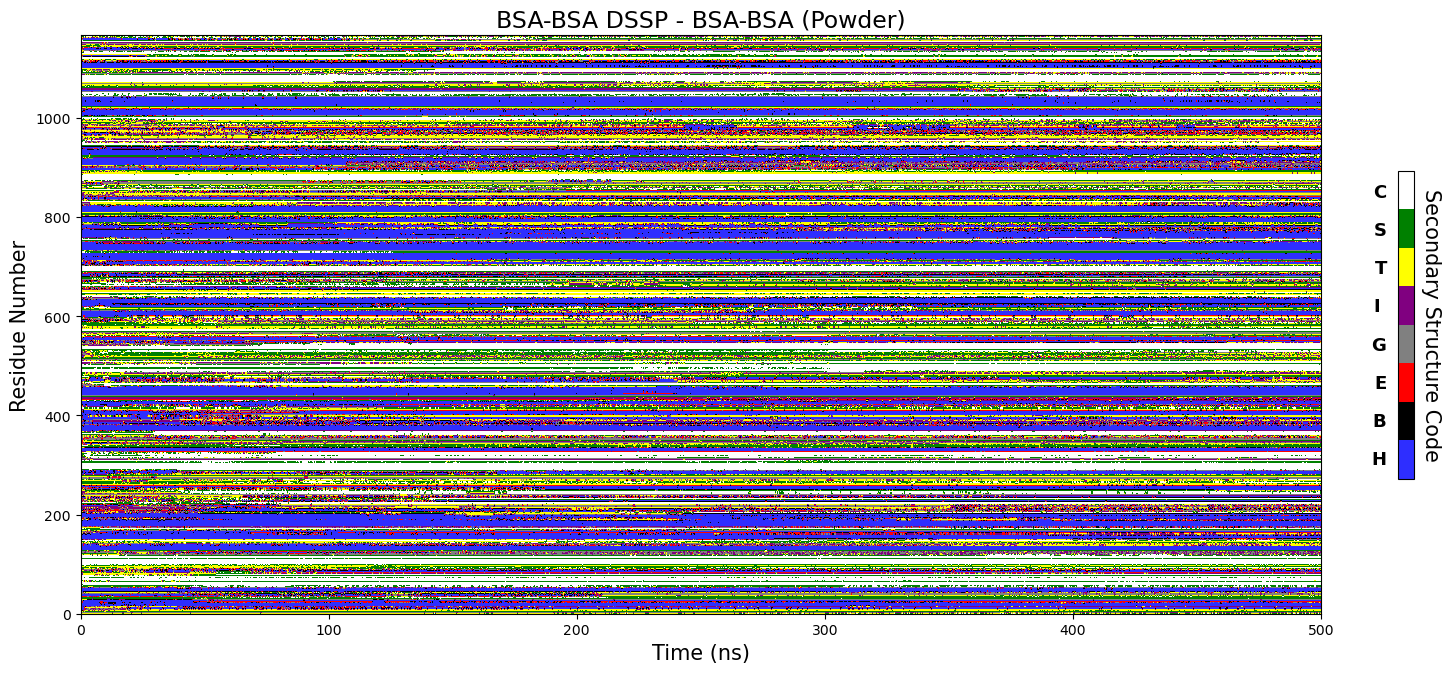



H (Helix/Alpha): 46.65%
E (Strand/Beta): 0.01%
C (Coil/Random): 53.35%


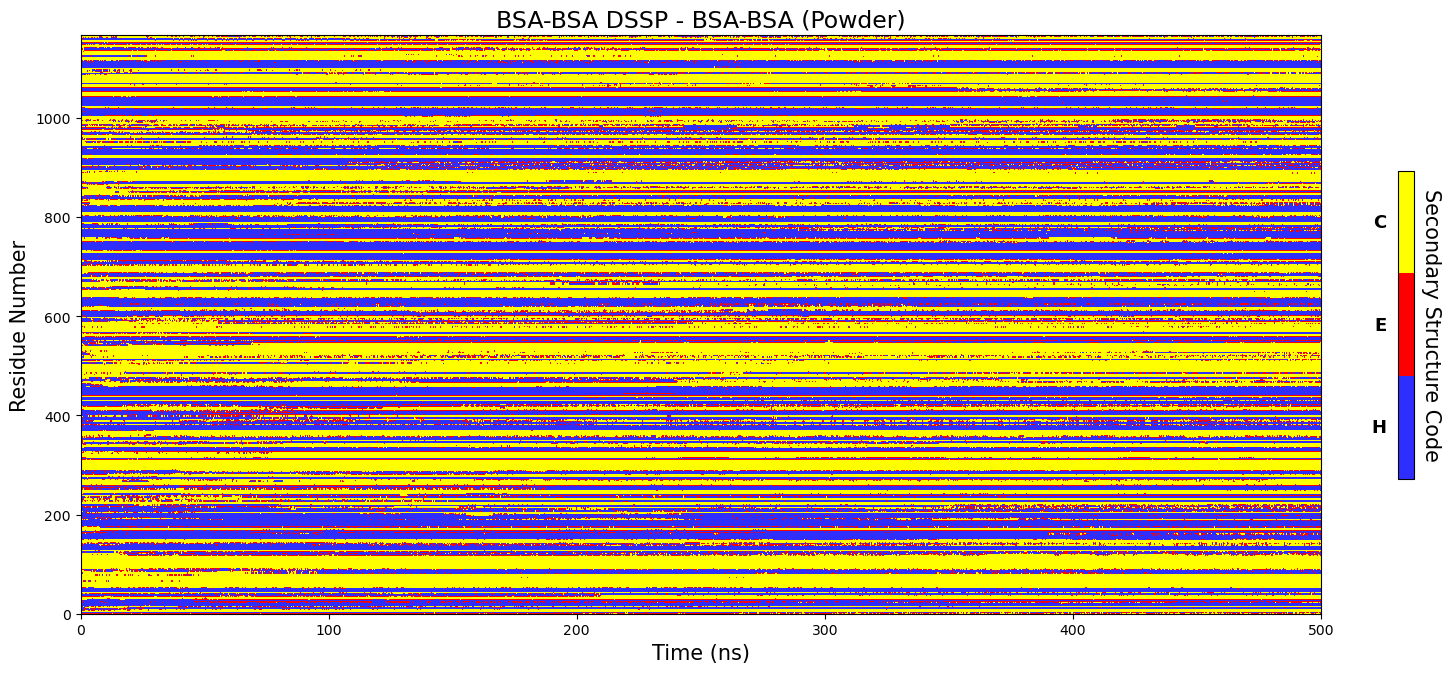



Alpha: 46.65%
Beta: 34.80%
Random Coil: 18.55%



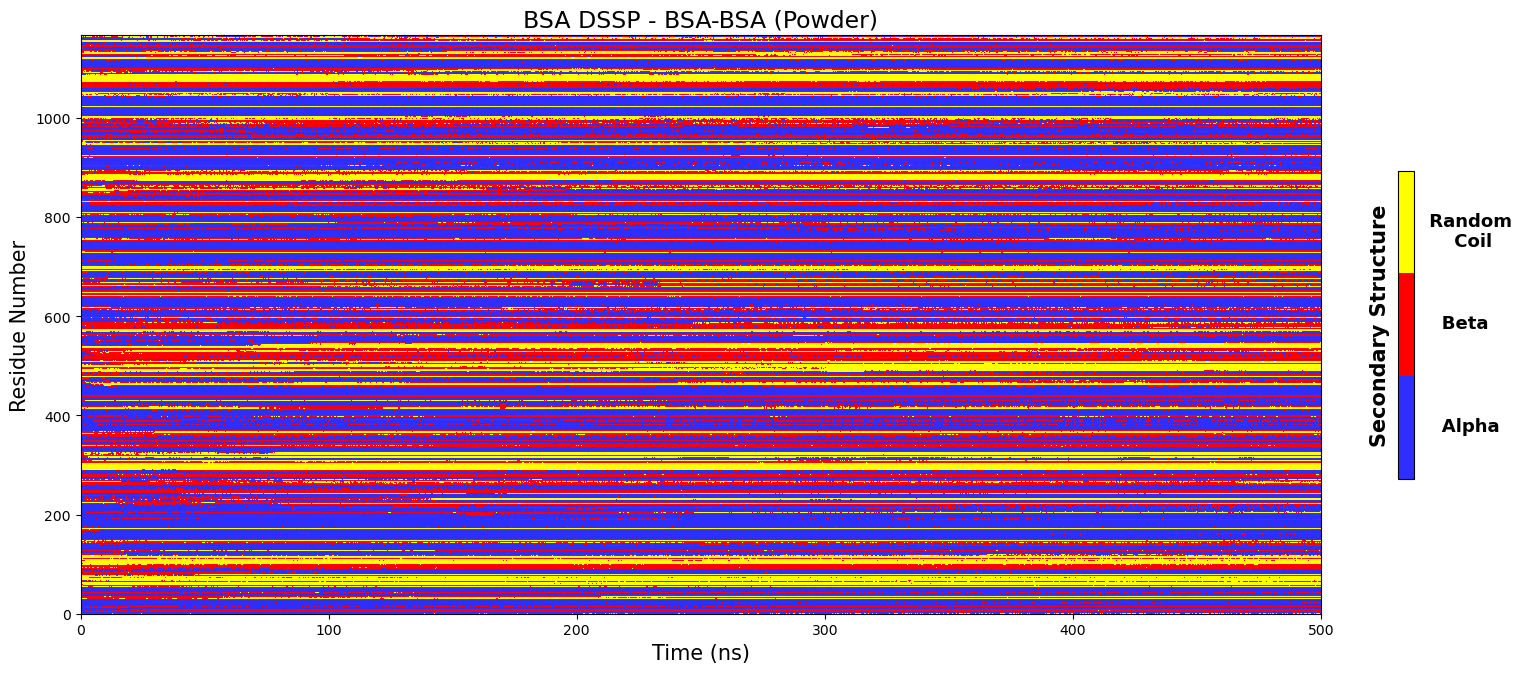

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 41.53%
B (B-Bridge): 0.16%
E (B-Sheet): 0.01%
G (3-Helix): 10.18%
I (5-Helix): 2.53%
T (B-Turn): 22.15%
S (Bend): 8.89%
C (Coil): 14.56%


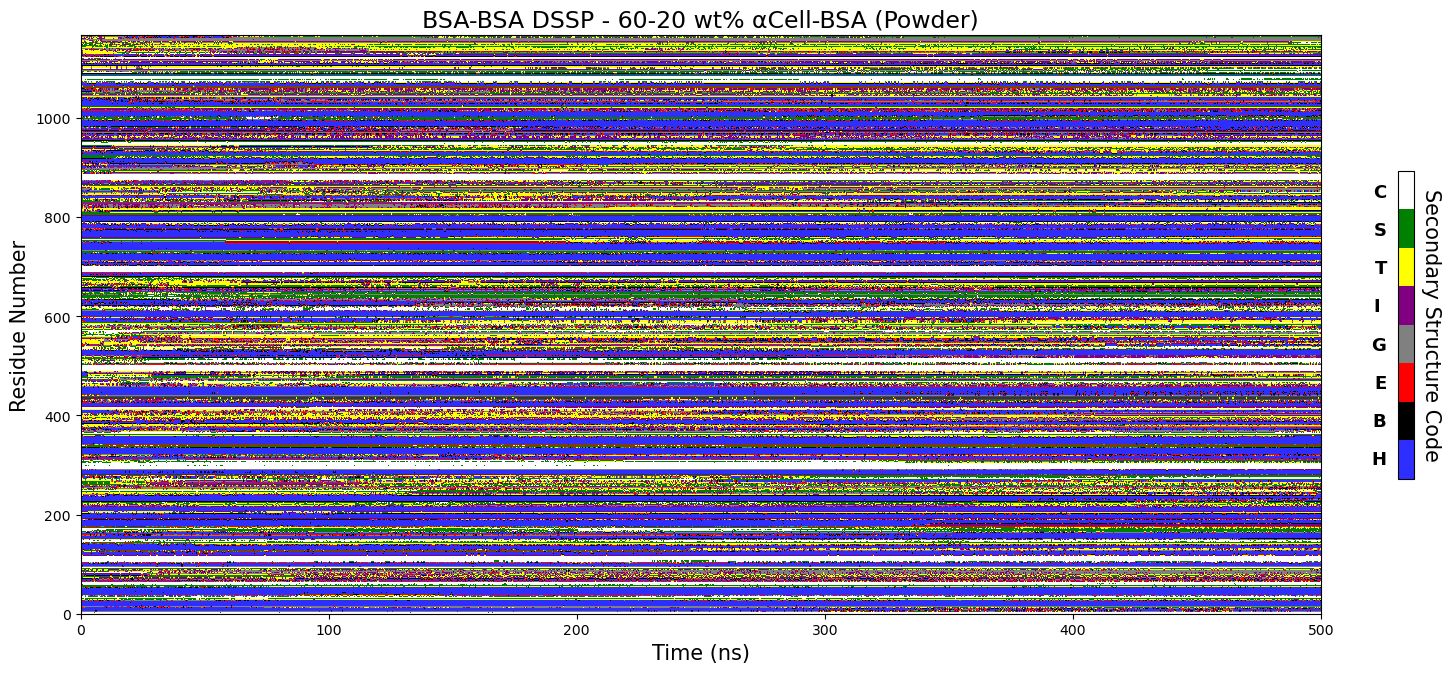



H (Helix/Alpha): 54.24%
E (Strand/Beta): 0.16%
C (Coil/Random): 45.60%


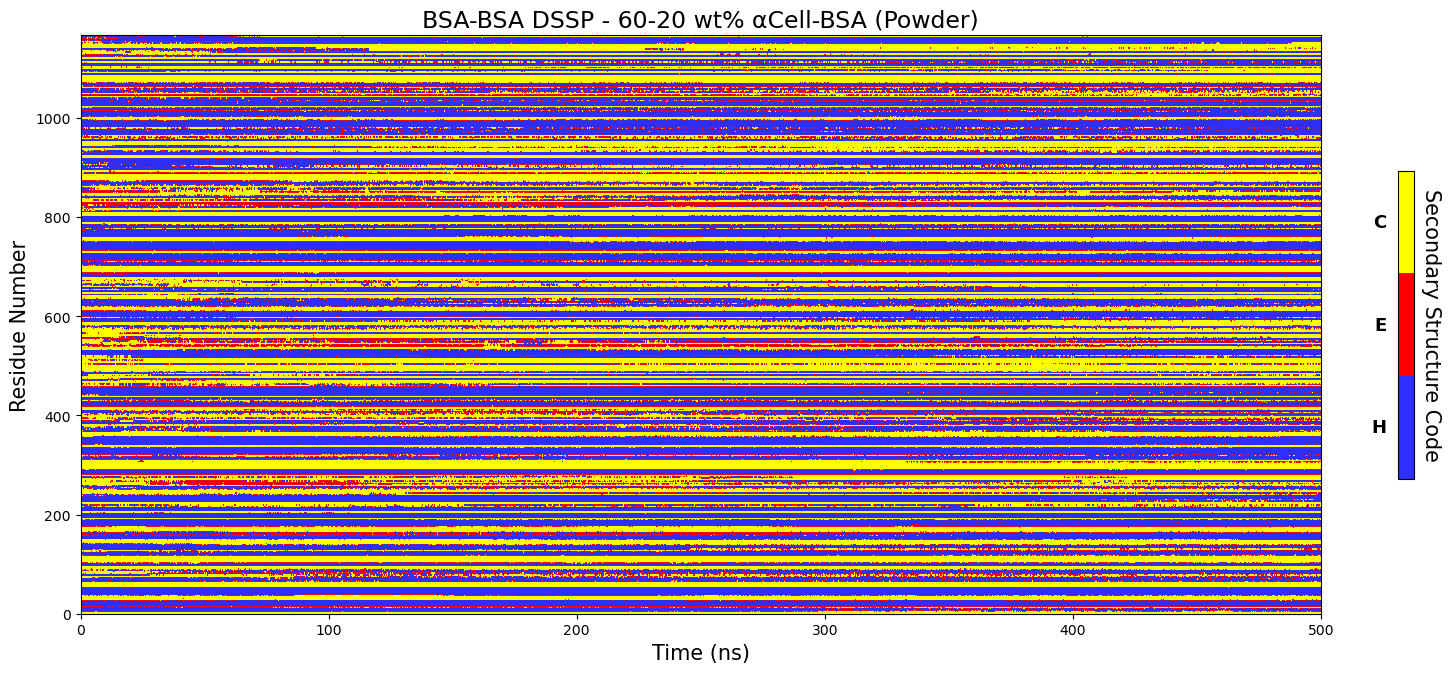



Alpha: 54.24%
Beta: 31.21%
Random Coil: 14.56%



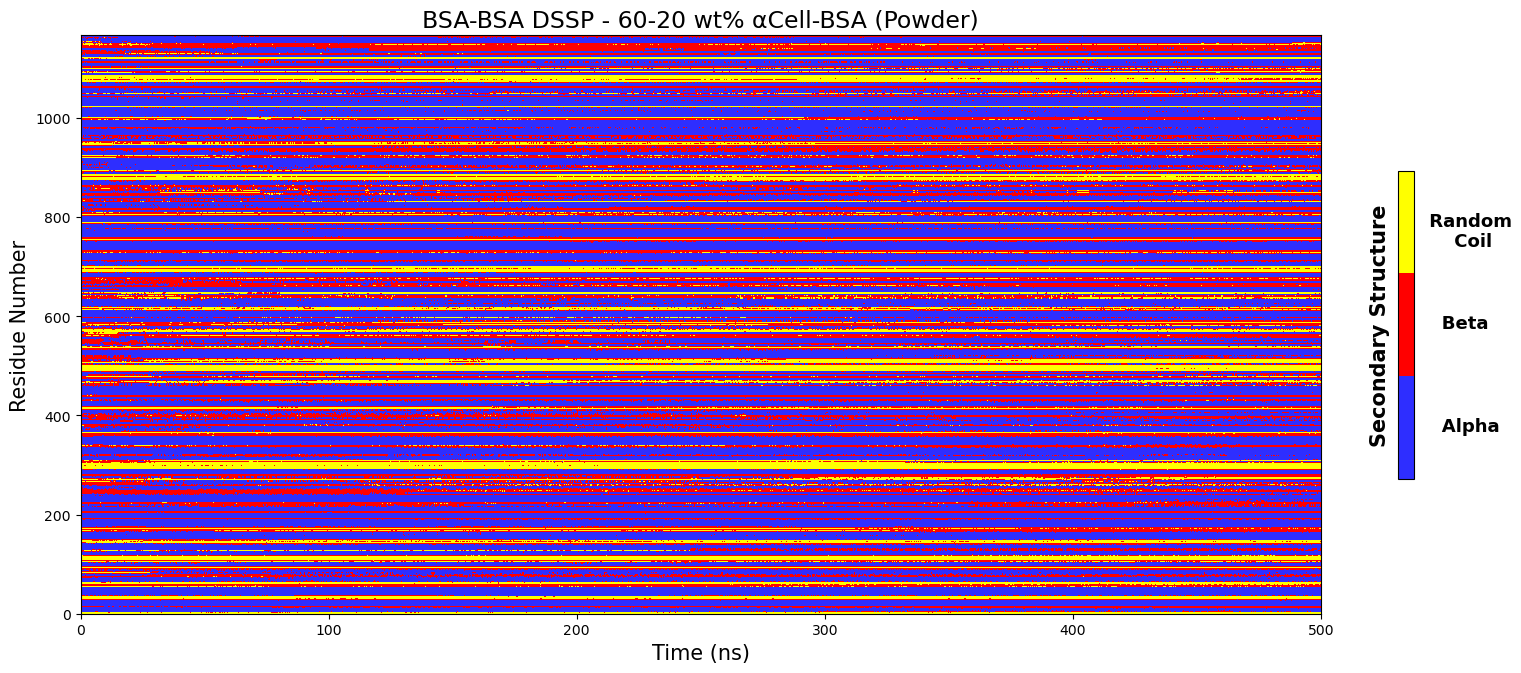

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 48.55%
B (B-Bridge): 0.14%
E (B-Sheet): 0.00%
G (3-Helix): 6.94%
I (5-Helix): 2.43%
T (B-Turn): 19.70%
S (Bend): 8.91%
C (Coil): 13.34%


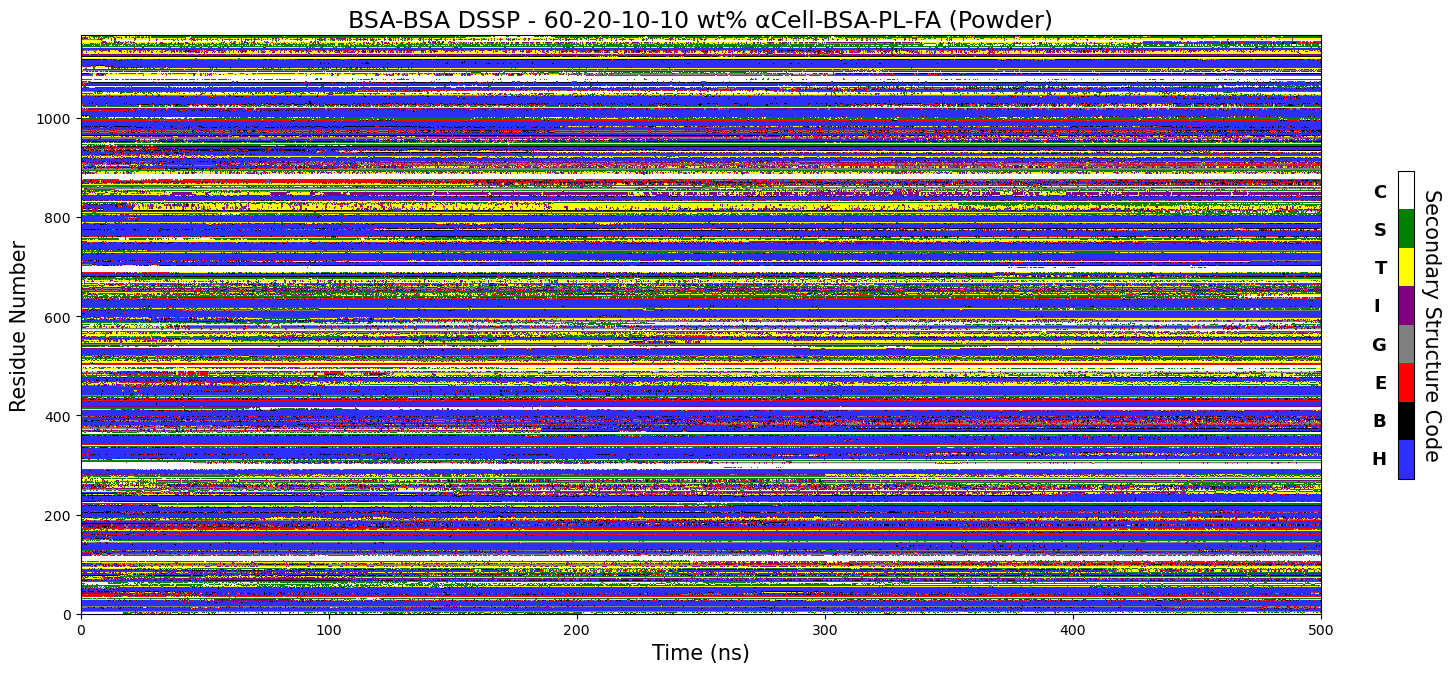



H (Helix/Alpha): 57.91%
E (Strand/Beta): 0.14%
C (Coil/Random): 41.95%


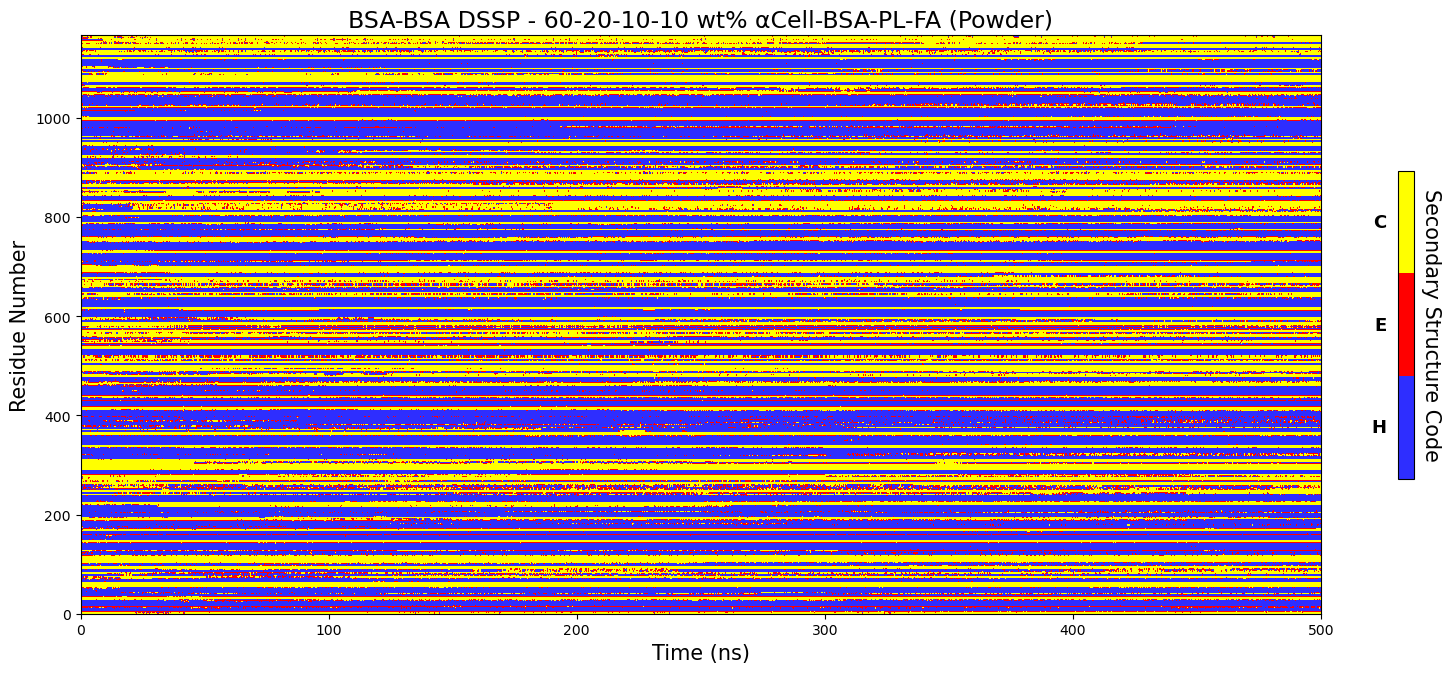



Alpha: 57.91%
Beta: 28.75%
Random Coil: 13.34%



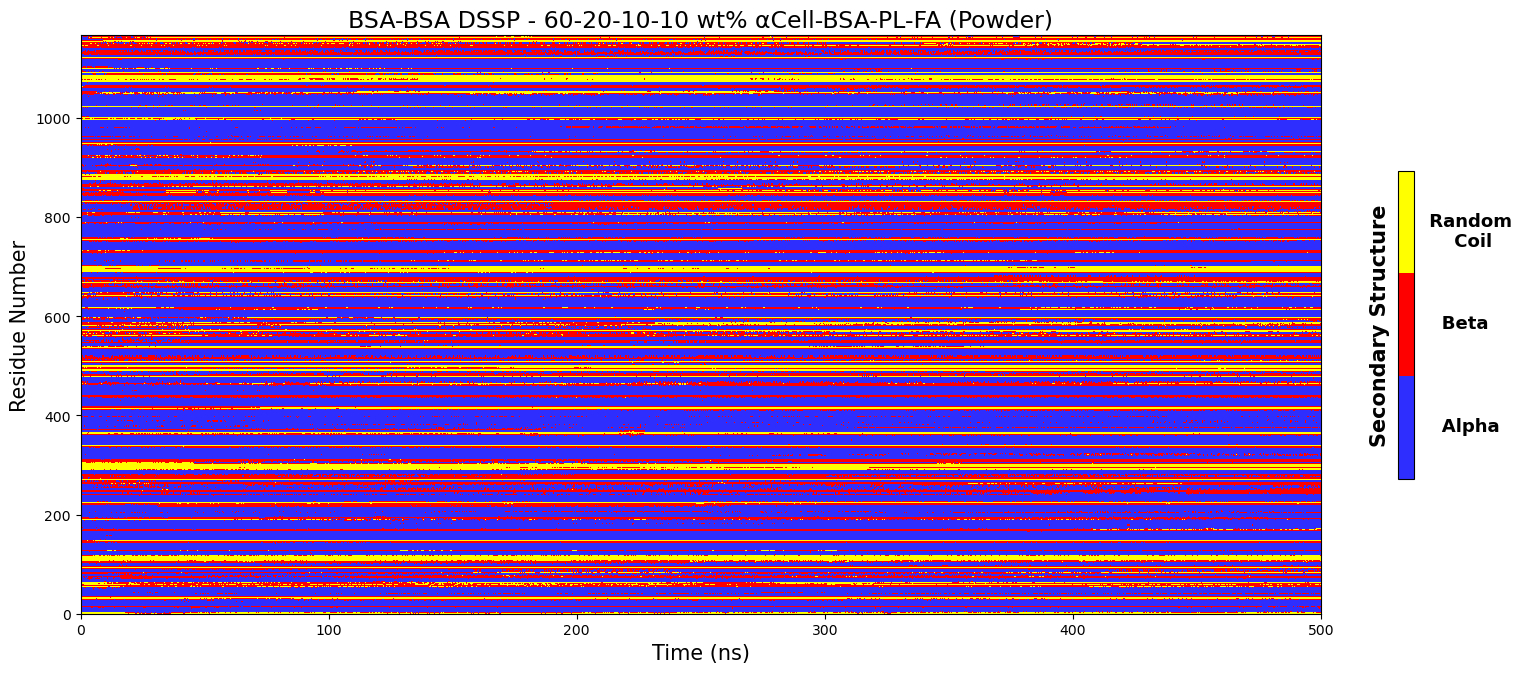

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import mdtraj as mdj

traj = mdj.load('../../BSA-BSA_powder/traj_cluster_whole.xtc', top='../../BSA-BSA_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - BSA-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - BSA-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA DSSP - BSA-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA-BSA-402x_Cellulose6_powder/traj_whole_nojump_mol.xtc', top='../../BSA-BSA-402x_Cellulose6_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA-BSA-402x_Cellulose6-292x_SRB-186x_STA_powder/traj_whole_nojump_mol.xtc', top='../../BSA-BSA-402x_Cellulose6-292x_SRB-186x_STA_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Powder)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 23.15%
B (B-Bridge): 0.28%
E (B-Sheet): 0.00%
G (3-Helix): 12.03%
I (5-Helix): 2.68%
T (B-Turn): 24.27%
S (Bend): 16.25%
C (Coil): 21.35%


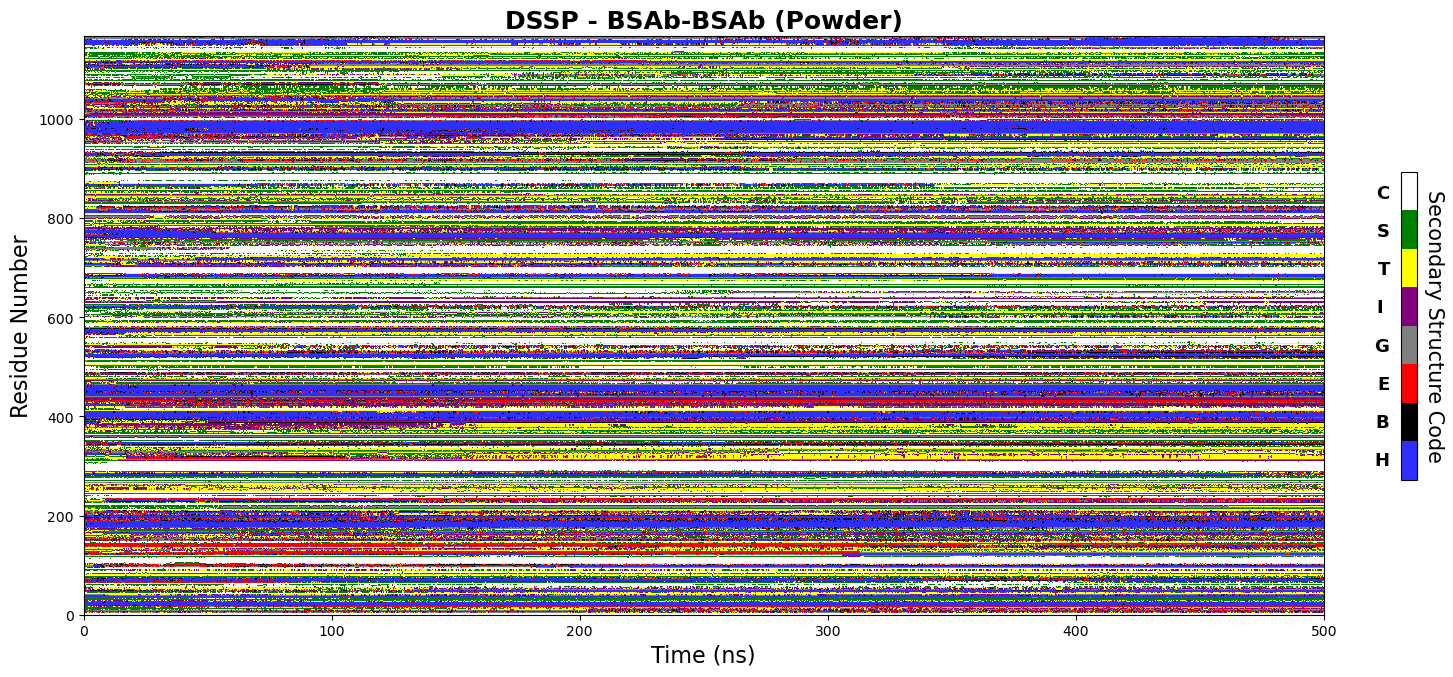



H (Helix/Alpha): 37.86%
E (Strand/Beta): 0.28%
C (Coil/Random): 61.86%


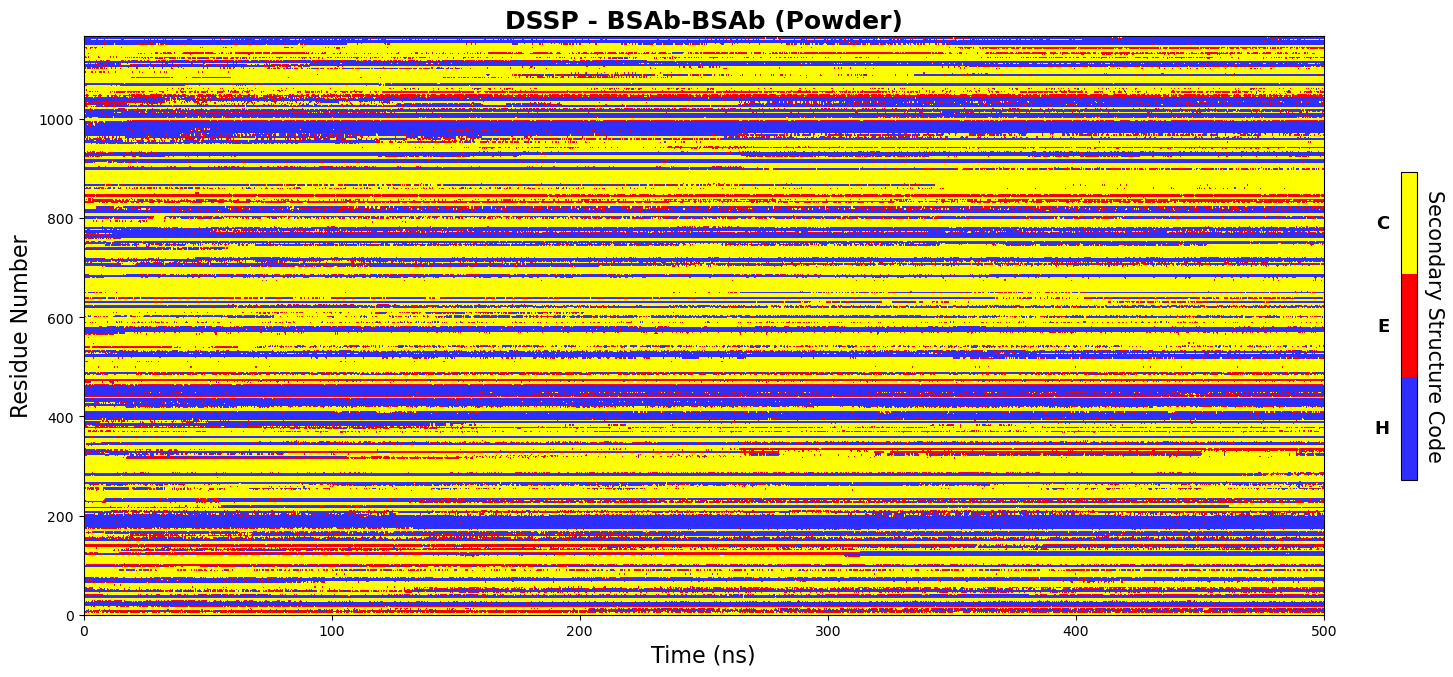



Alpha: 37.86%
Beta: 40.79%
Random Coil: 21.35%



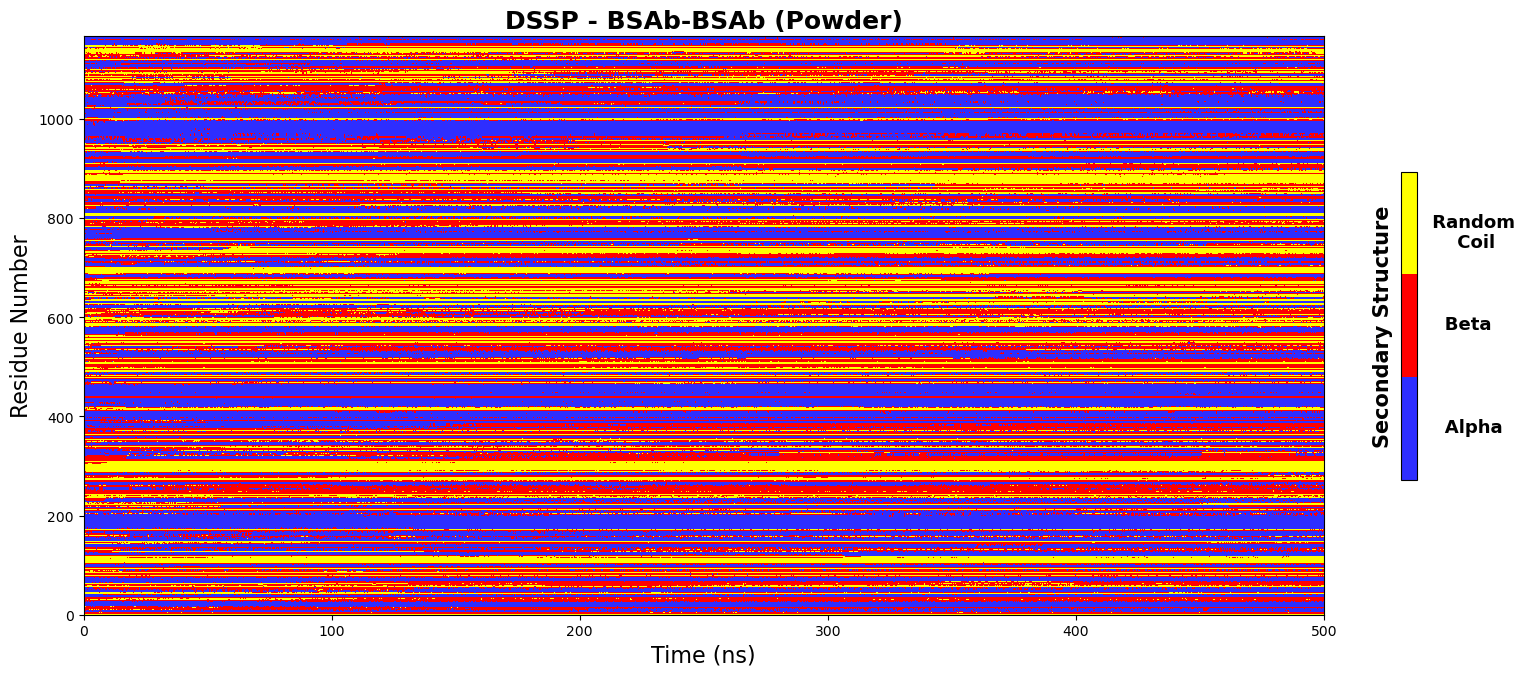

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 28.23%
B (B-Bridge): 0.30%
E (B-Sheet): 0.00%
G (3-Helix): 10.30%
I (5-Helix): 2.40%
T (B-Turn): 26.87%
S (Bend): 14.55%
C (Coil): 17.35%


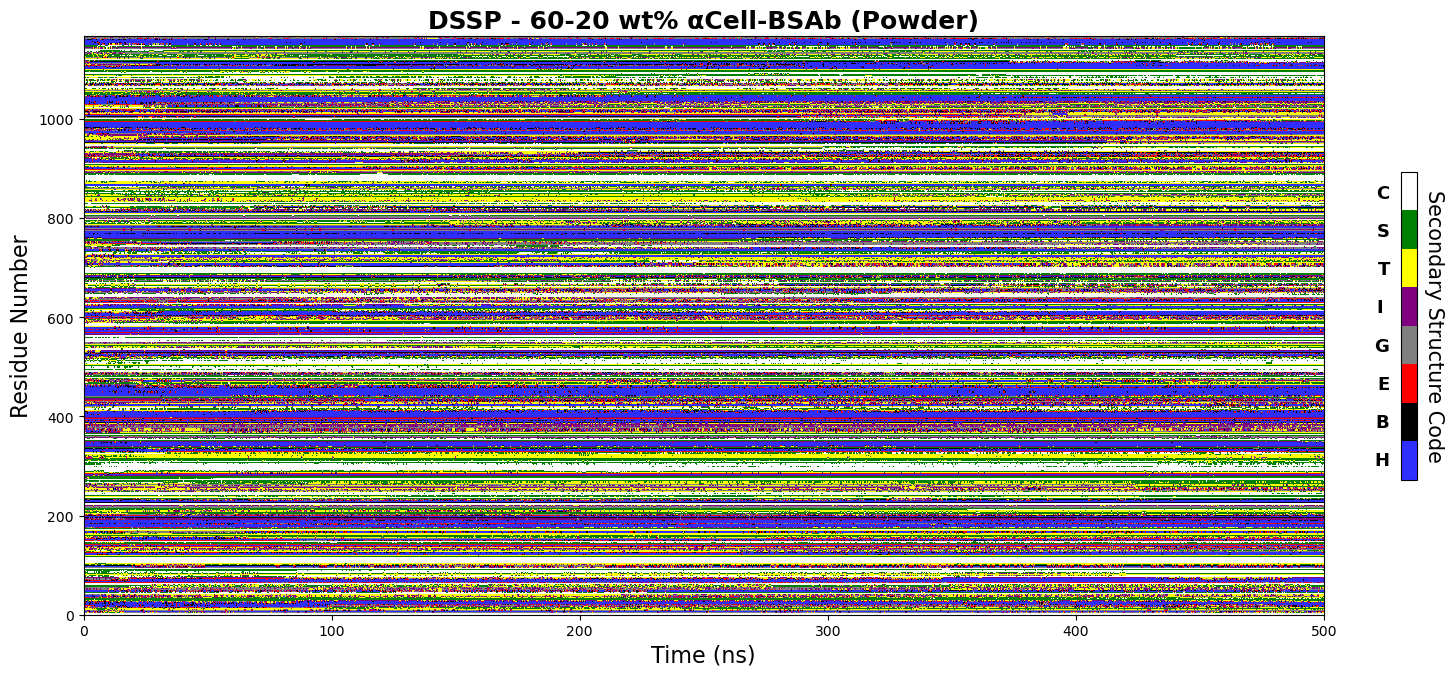



H (Helix/Alpha): 40.93%
E (Strand/Beta): 0.30%
C (Coil/Random): 58.77%


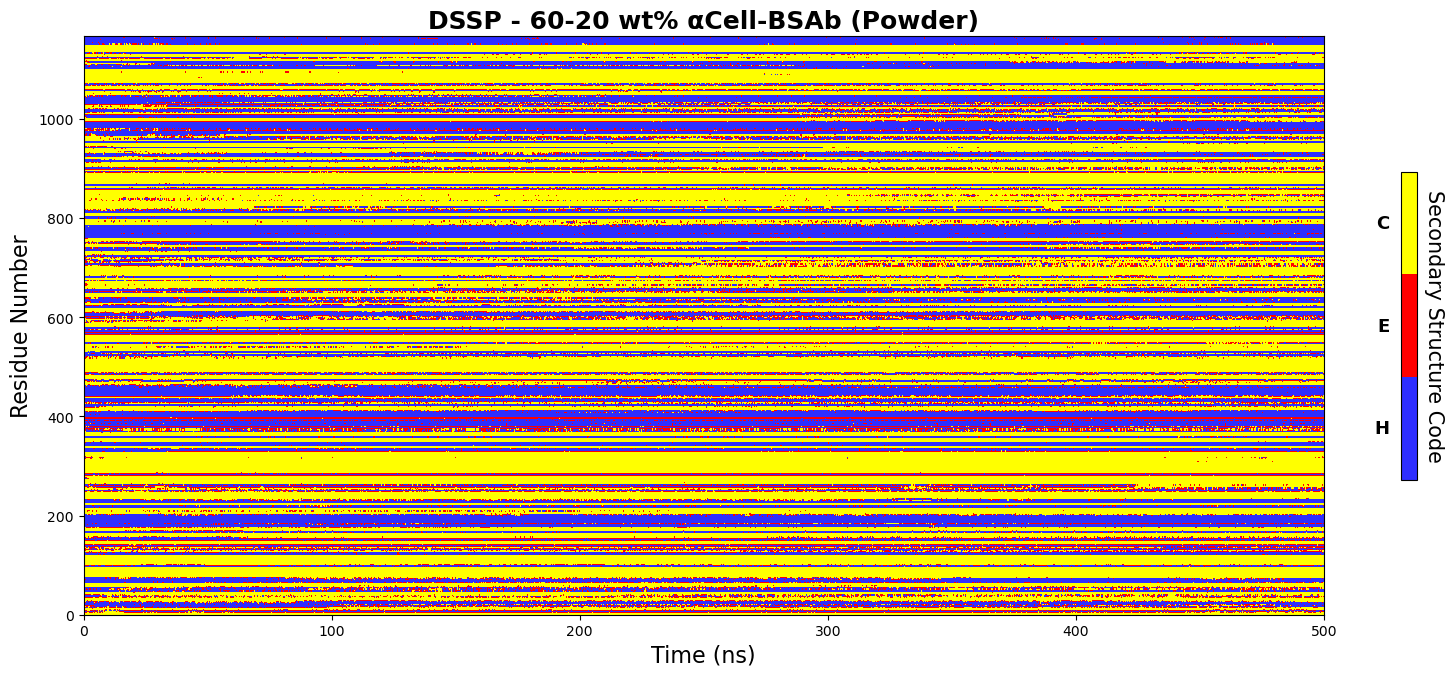



Alpha: 40.93%
Beta: 41.72%
Random Coil: 17.35%



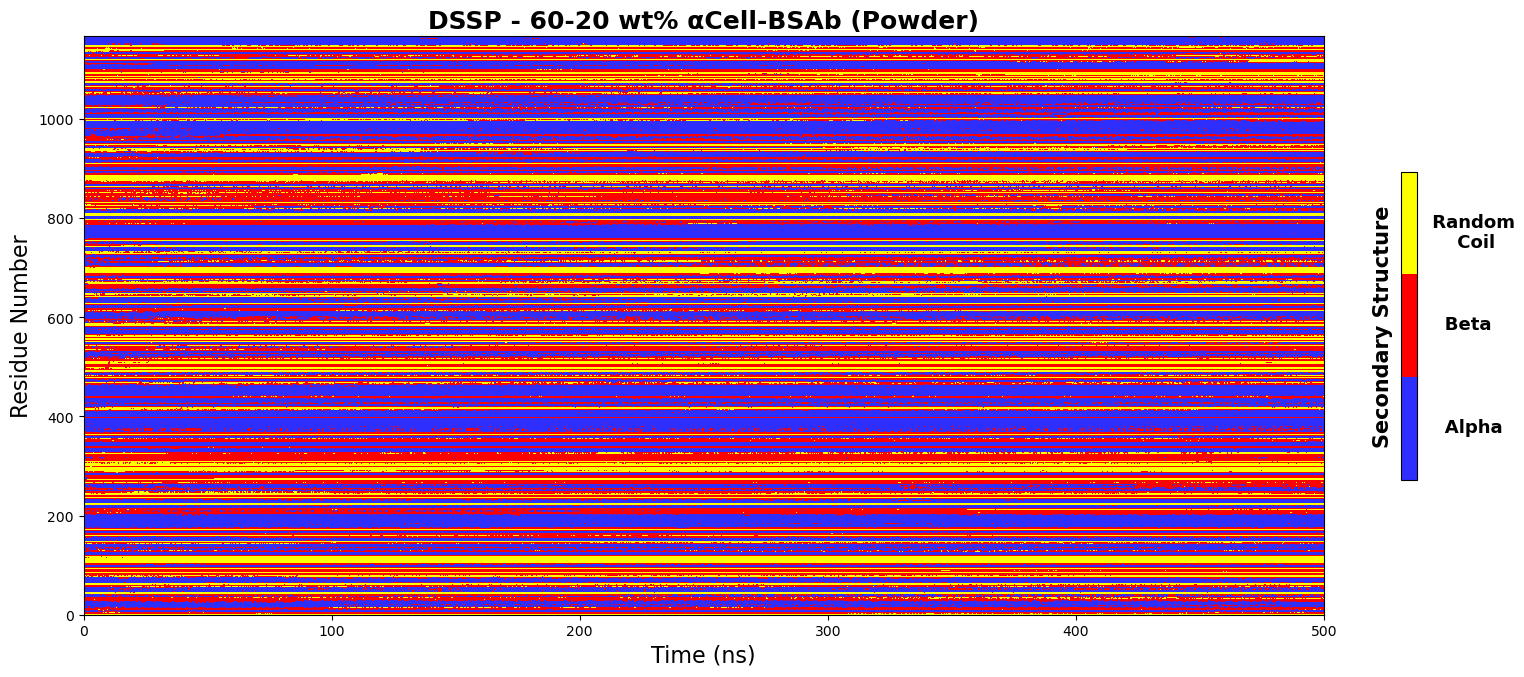

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 29.47%
B (B-Bridge): 0.24%
E (B-Sheet): 0.00%
G (3-Helix): 10.28%
I (5-Helix): 3.09%
T (B-Turn): 25.44%
S (Bend): 13.79%
C (Coil): 17.70%


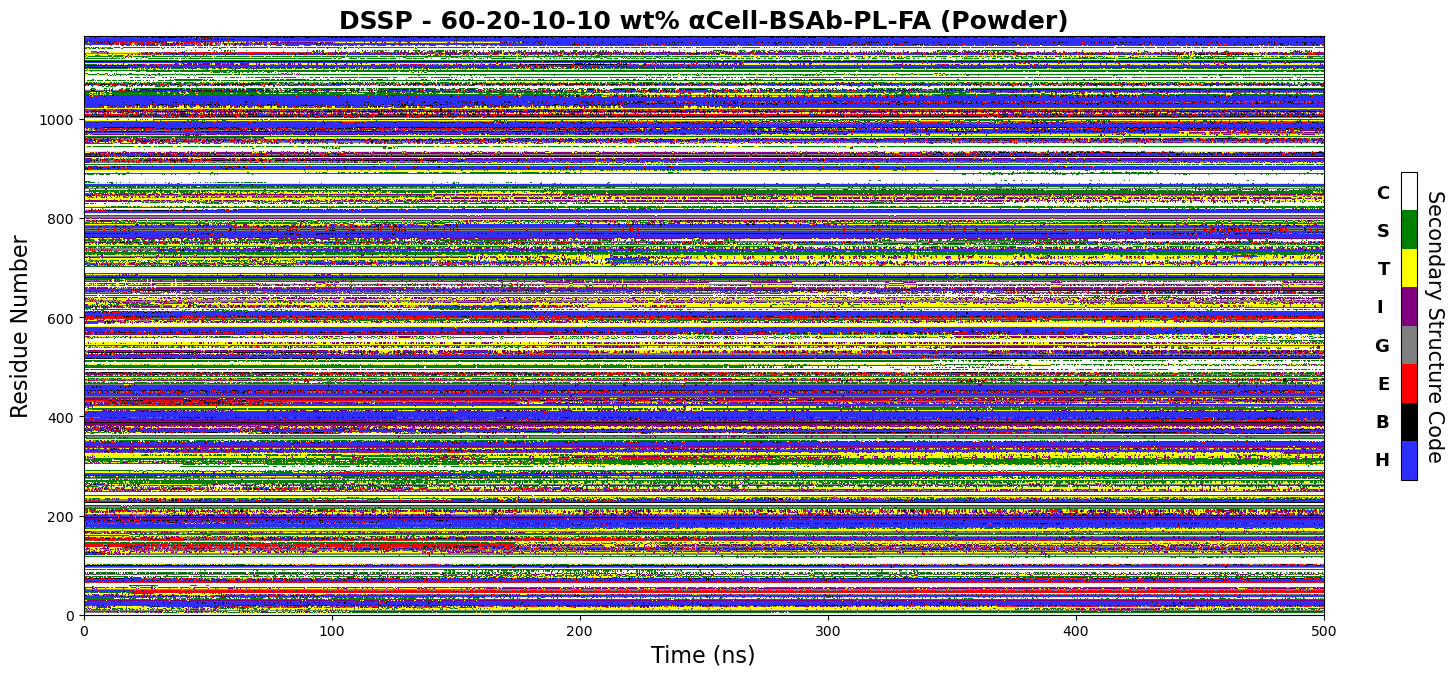



H (Helix/Alpha): 42.84%
E (Strand/Beta): 0.24%
C (Coil/Random): 56.92%


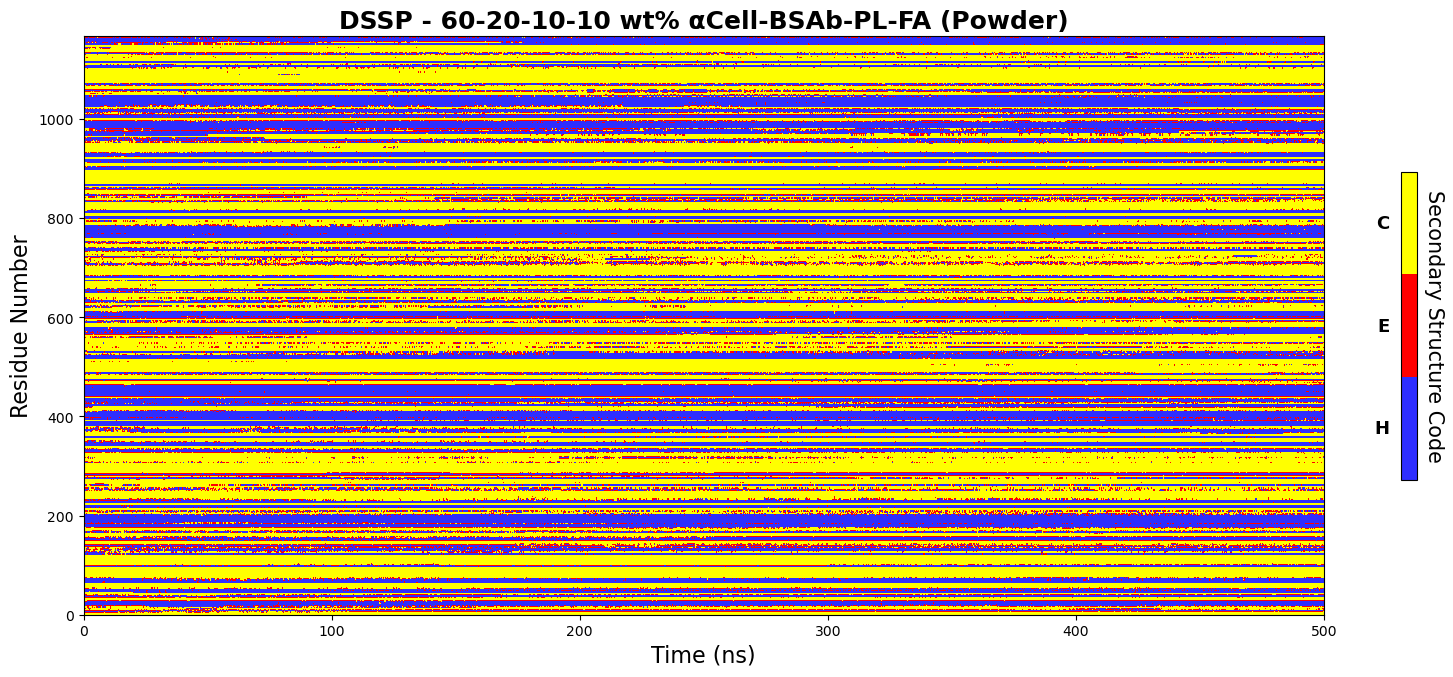



Alpha: 42.84%
Beta: 39.47%
Random Coil: 17.70%



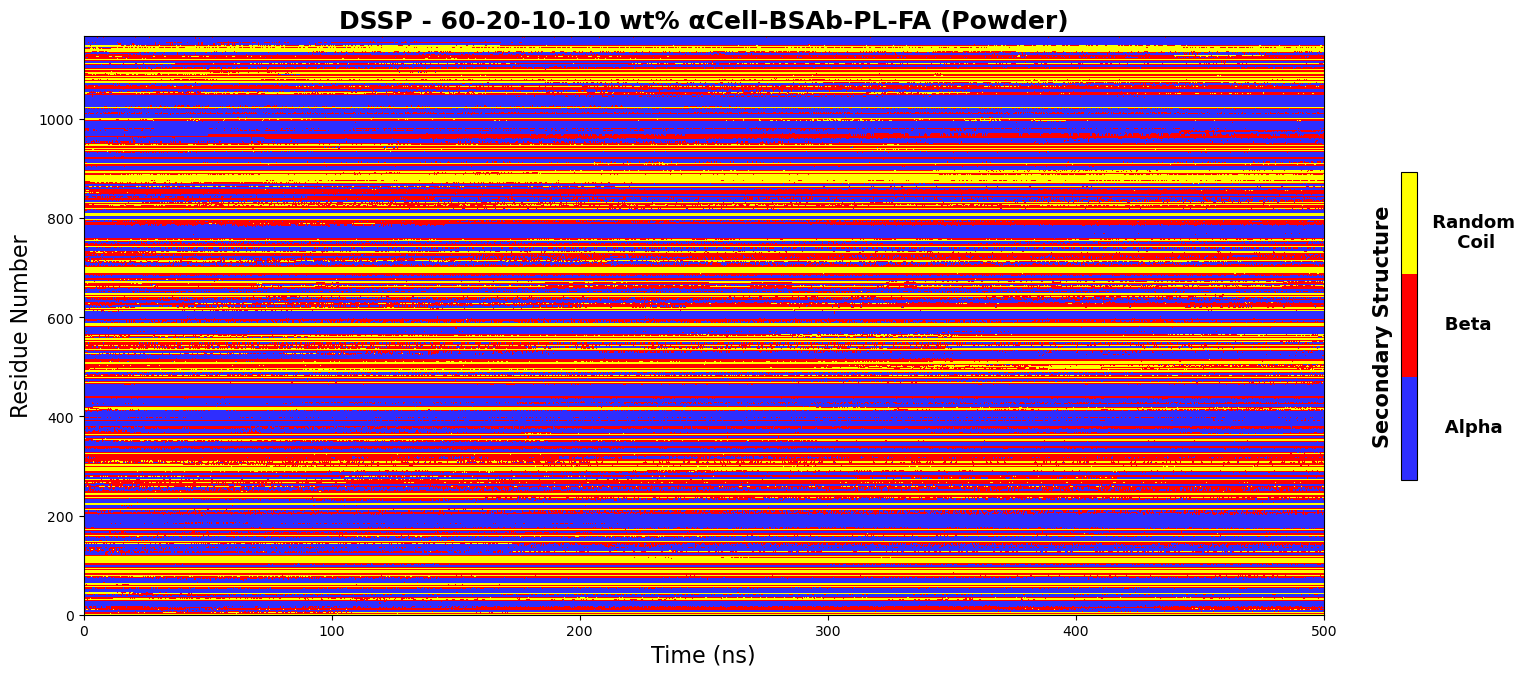

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import mdtraj as mdj

traj = mdj.load('../../BSA_b-BSA_b_powder/traj_cluster_whole.xtc', top='../../BSA_b-BSA_b_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA_b-BSA_b-402x_Cellulose6_powder/traj_whole_nojump_mol.xtc', top='../../BSA_b-BSA_b-402x_Cellulose6_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/traj_whole_nojump_mol.xtc', top='../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Powder)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 32.02%
B (B-Bridge): 0.02%
E (B-Sheet): 0.00%
G (3-Helix): 11.78%
I (5-Helix): 1.51%
T (B-Turn): 23.75%
S (Bend): 12.05%
C (Coil): 18.85%


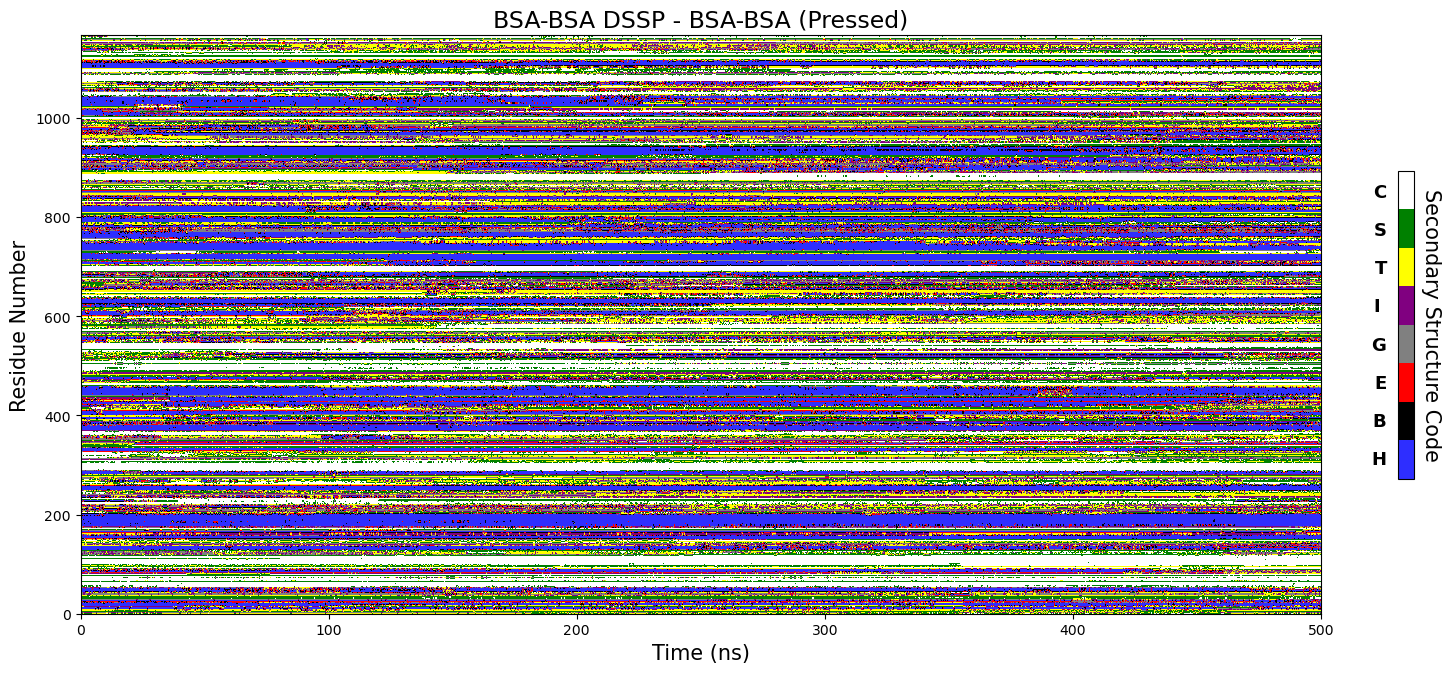



H (Helix/Alpha): 45.31%
E (Strand/Beta): 0.02%
C (Coil/Random): 54.66%


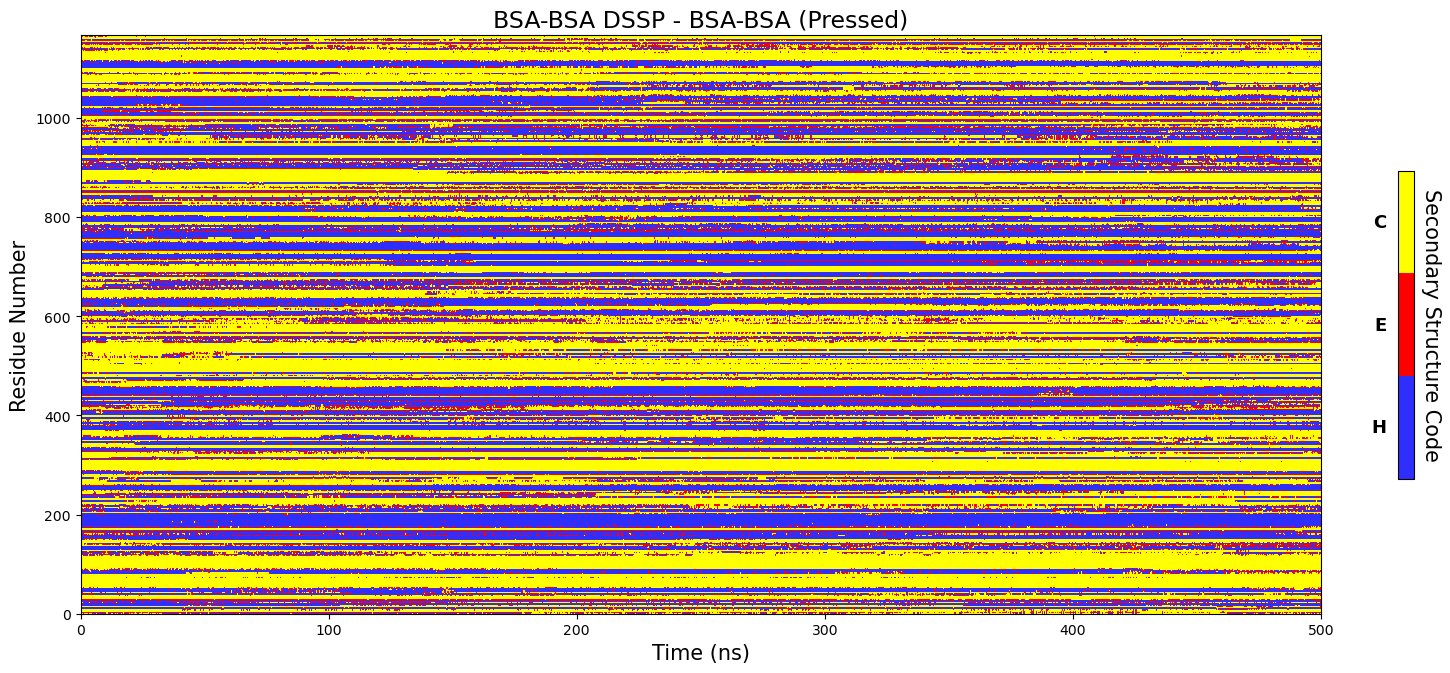



Alpha: 45.31%
Beta: 35.83%
Random Coil: 18.85%



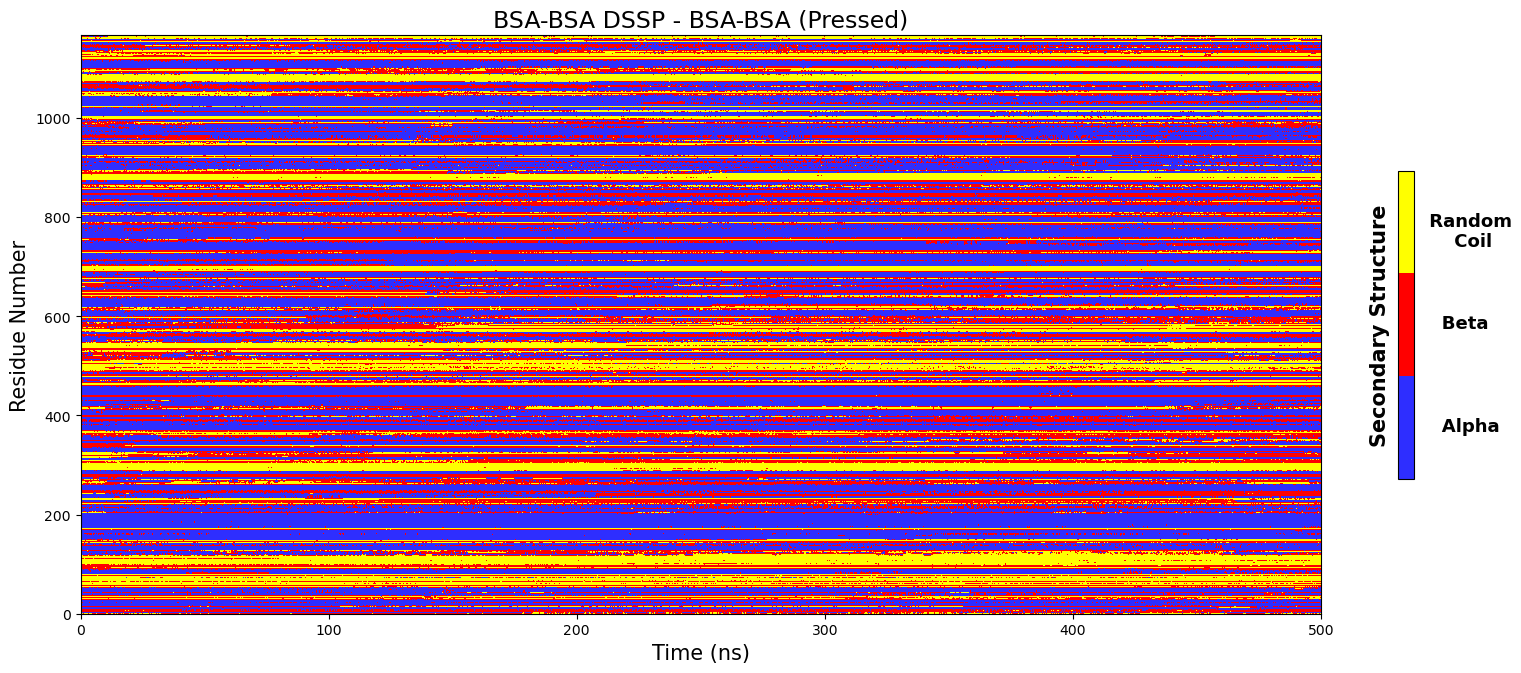

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 43.08%
B (B-Bridge): 0.13%
E (B-Sheet): 0.00%
G (3-Helix): 8.63%
I (5-Helix): 1.89%
T (B-Turn): 21.07%
S (Bend): 9.33%
C (Coil): 15.87%


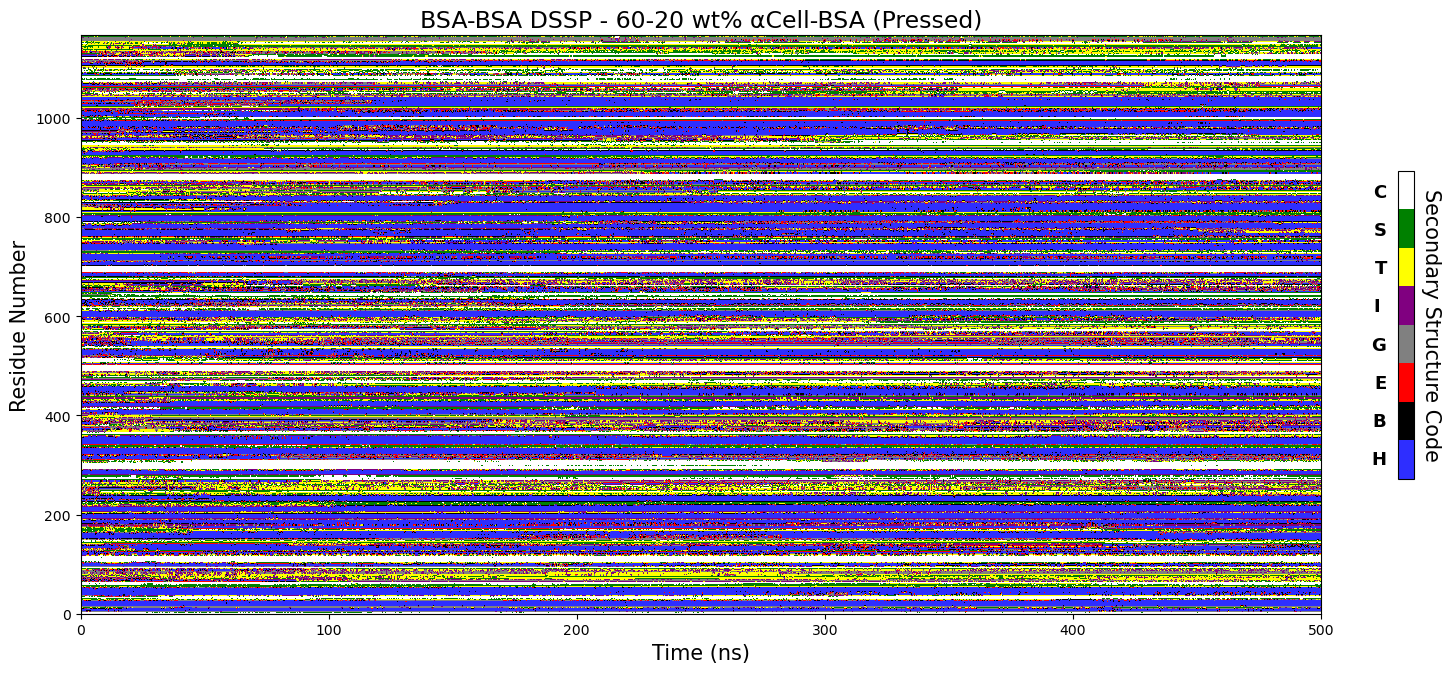



H (Helix/Alpha): 53.60%
E (Strand/Beta): 0.14%
C (Coil/Random): 46.27%


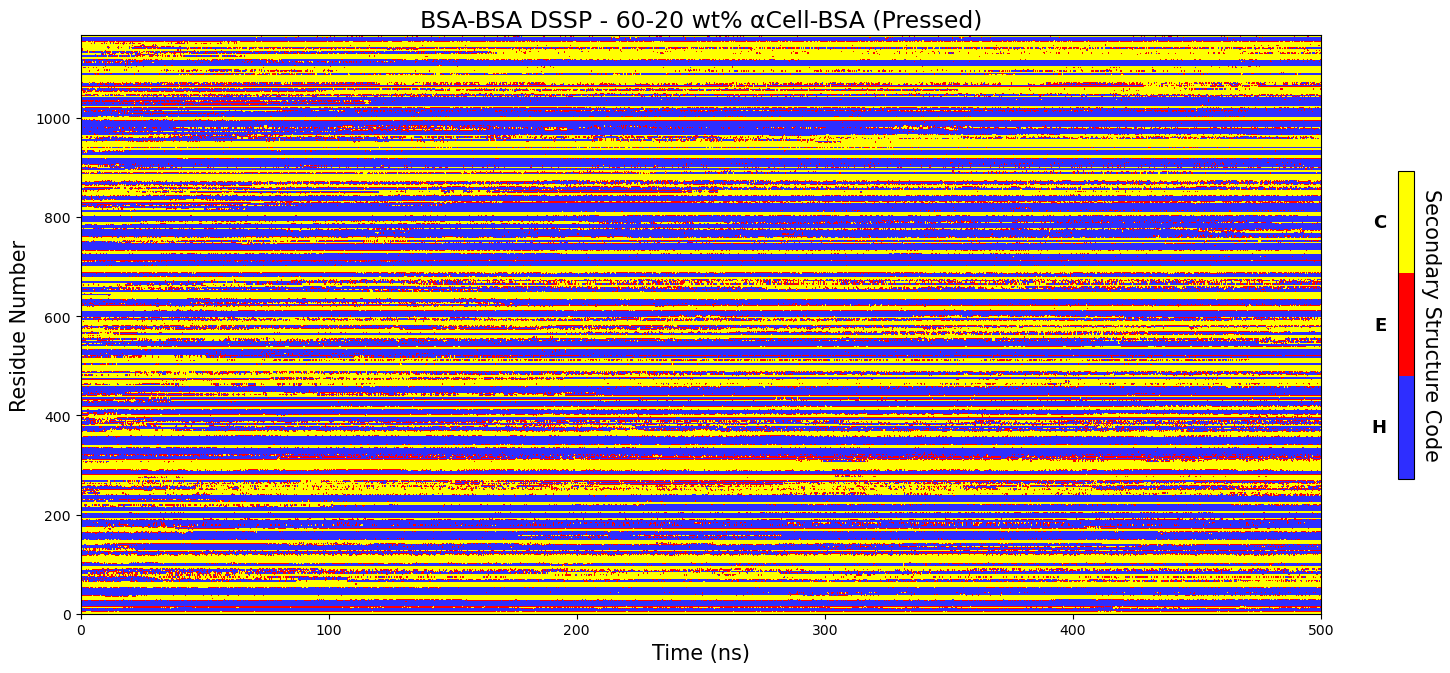



Alpha: 53.60%
Beta: 30.53%
Random Coil: 15.87%



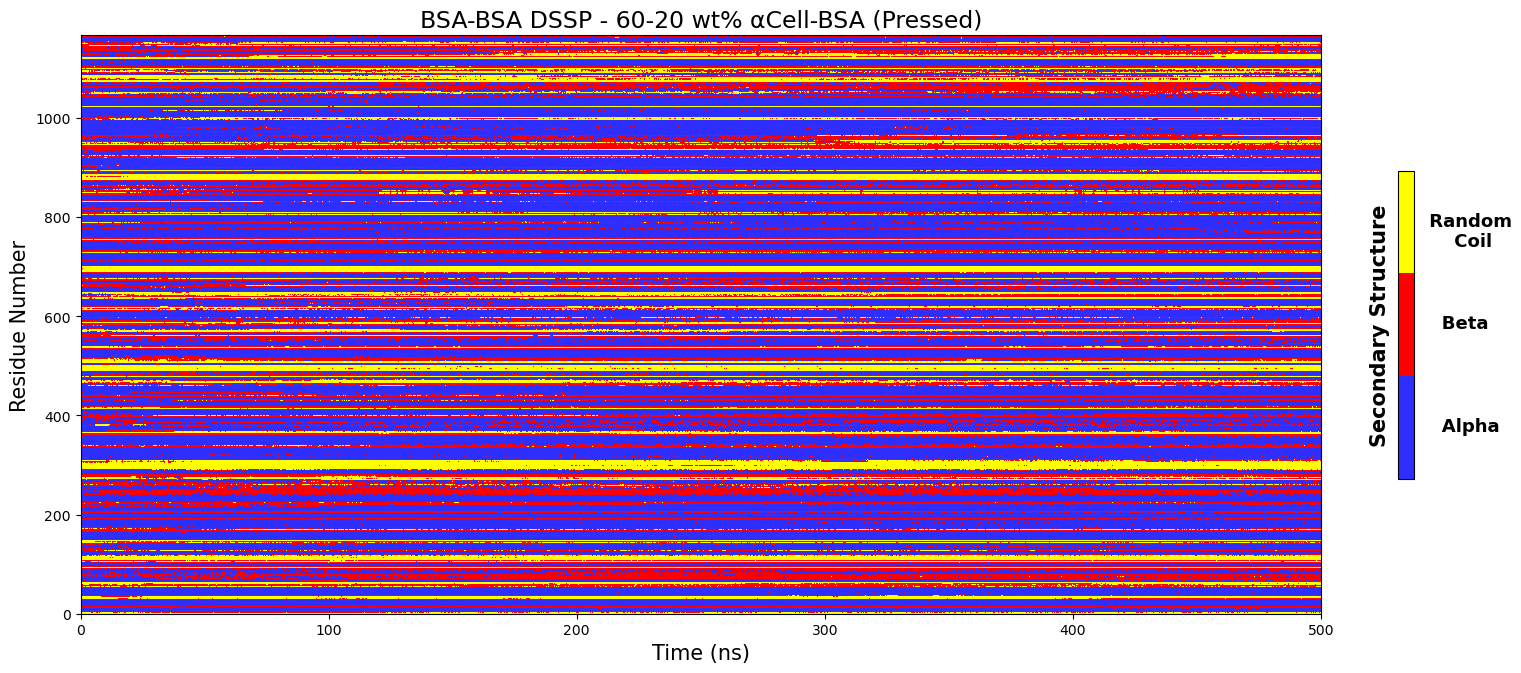

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 48.12%
B (B-Bridge): 0.04%
E (B-Sheet): 0.00%
G (3-Helix): 6.13%
I (5-Helix): 2.05%
T (B-Turn): 19.15%
S (Bend): 9.68%
C (Coil): 14.84%


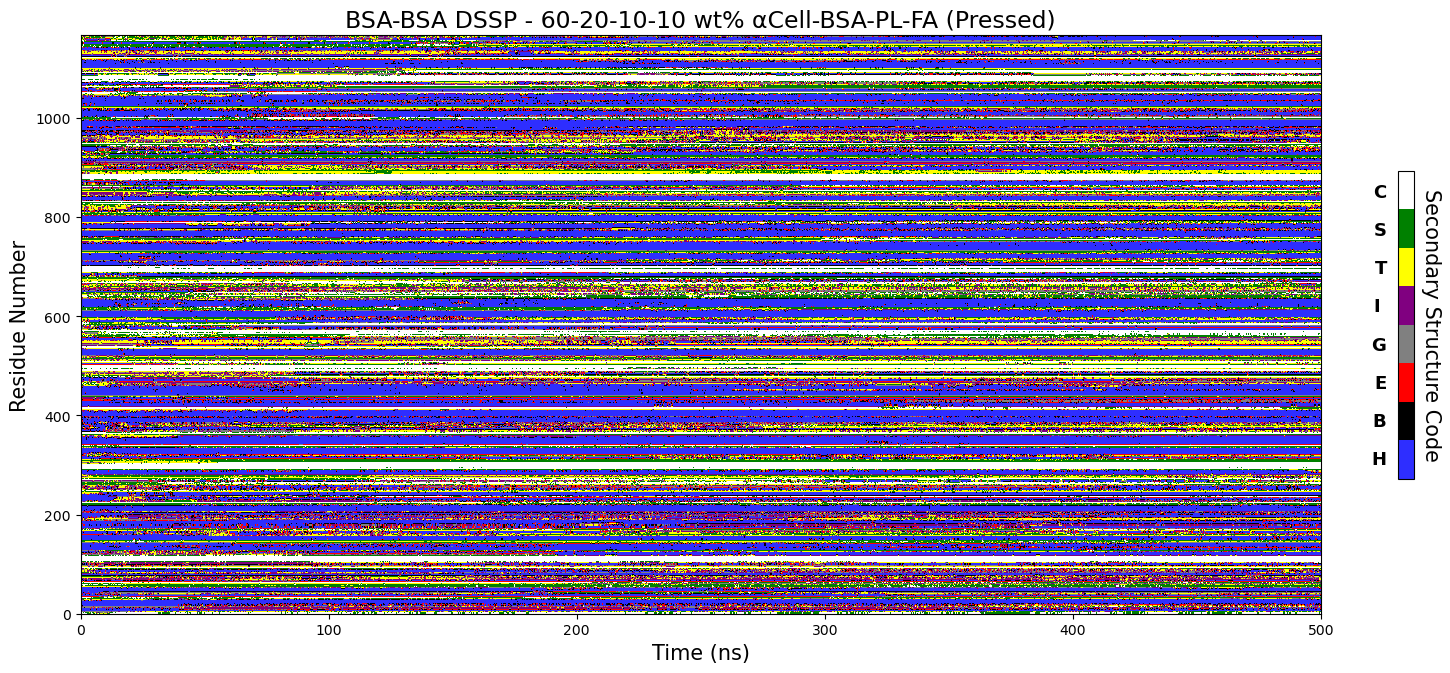



H (Helix/Alpha): 56.29%
E (Strand/Beta): 0.04%
C (Coil/Random): 43.66%


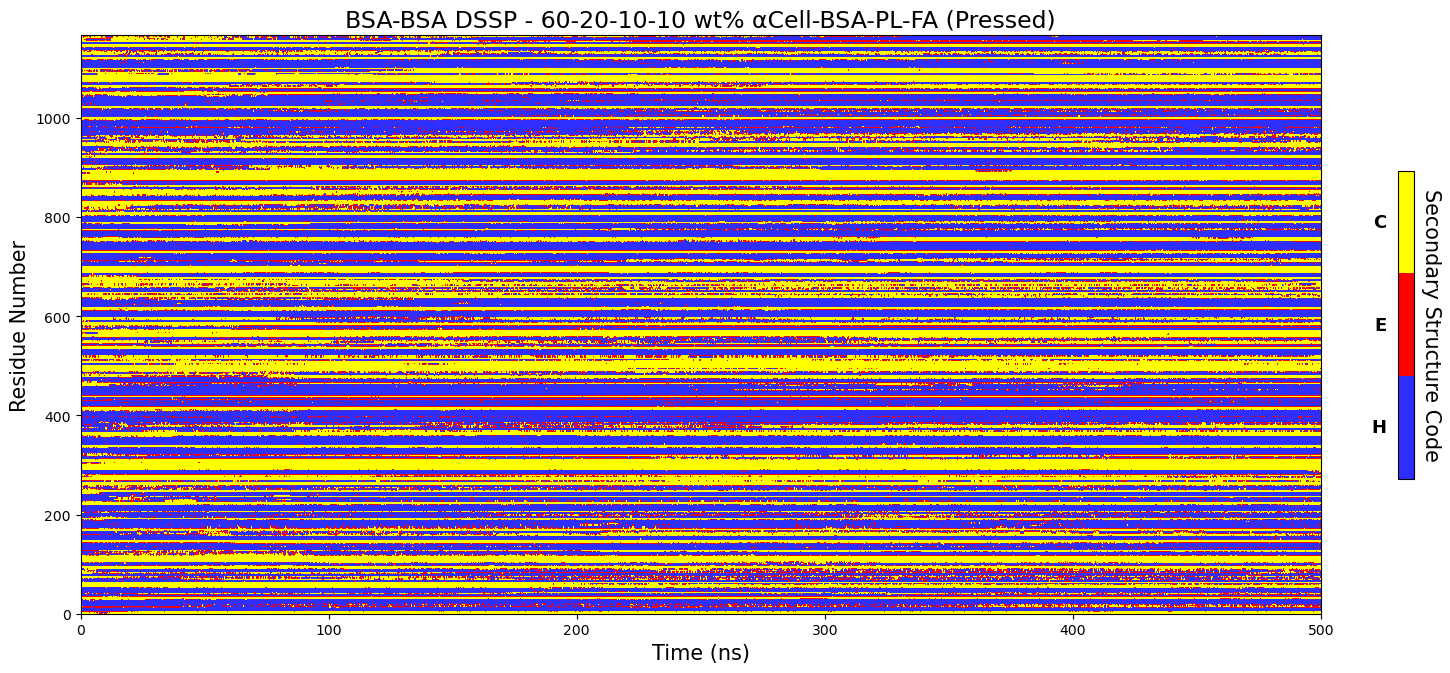



Alpha: 56.29%
Beta: 28.87%
Random Coil: 14.84%



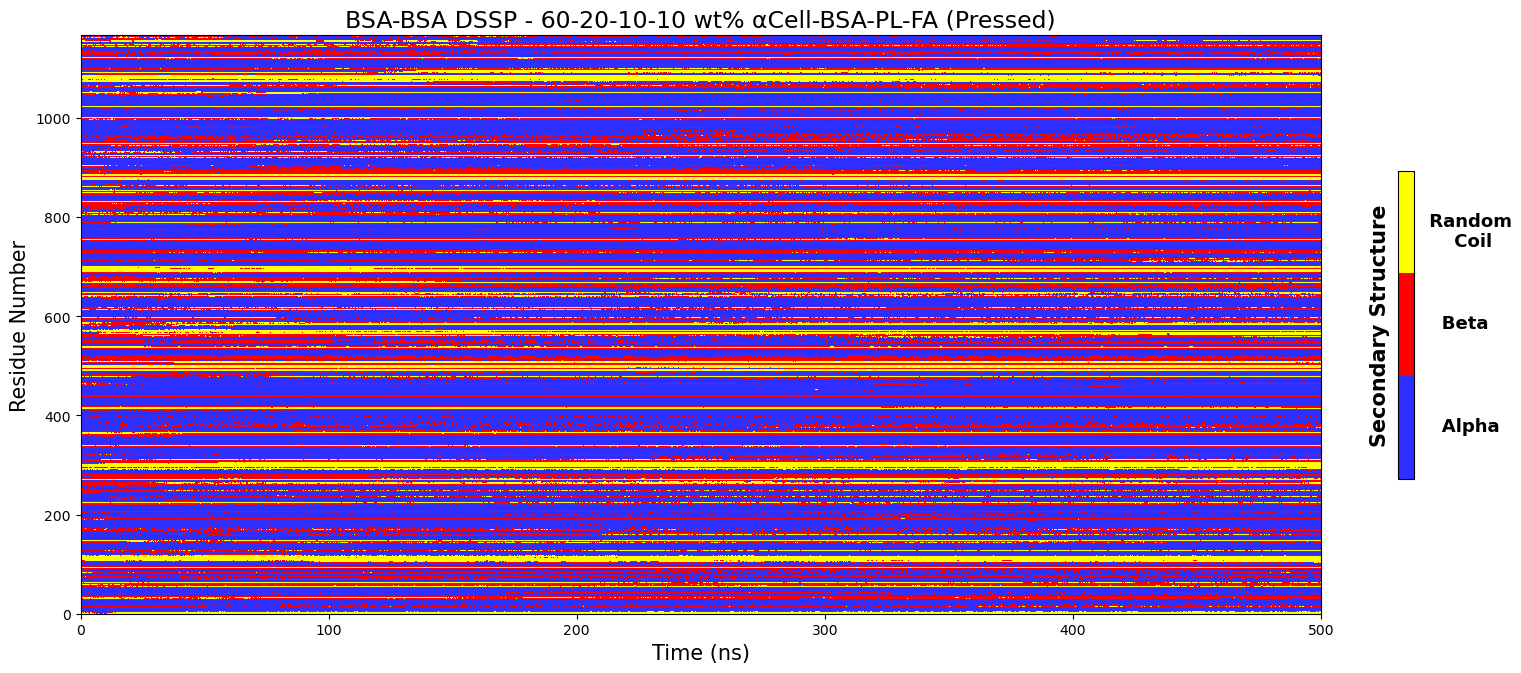

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import mdtraj as mdj

traj = mdj.load('../../BSA-BSA_pressed/traj_cluster_whole.xtc', top='../../BSA-BSA_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - BSA-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - BSA-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - BSA-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA-BSA-402x_Cellulose6_pressed/traj_whole_nojump_mol.xtc', top='../../BSA-BSA-402x_Cellulose6_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20 wt% αCell-BSA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA-BSA-402x_Cellulose6-292x_SRB-186x_STA_pressed/traj_whole_nojump_mol.xtc', top='../../BSA-BSA-402x_Cellulose6-292x_SRB-186x_STA_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Residue Number', fontsize=15)
plt.title('BSA-BSA DSSP - 60-20-10-10 wt% αCell-BSA-PL-FA (Pressed)', fontsize=17)
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 23.12%
B (B-Bridge): 0.36%
E (B-Sheet): 0.00%
G (3-Helix): 11.31%
I (5-Helix): 1.89%
T (B-Turn): 25.33%
S (Bend): 16.34%
C (Coil): 21.65%


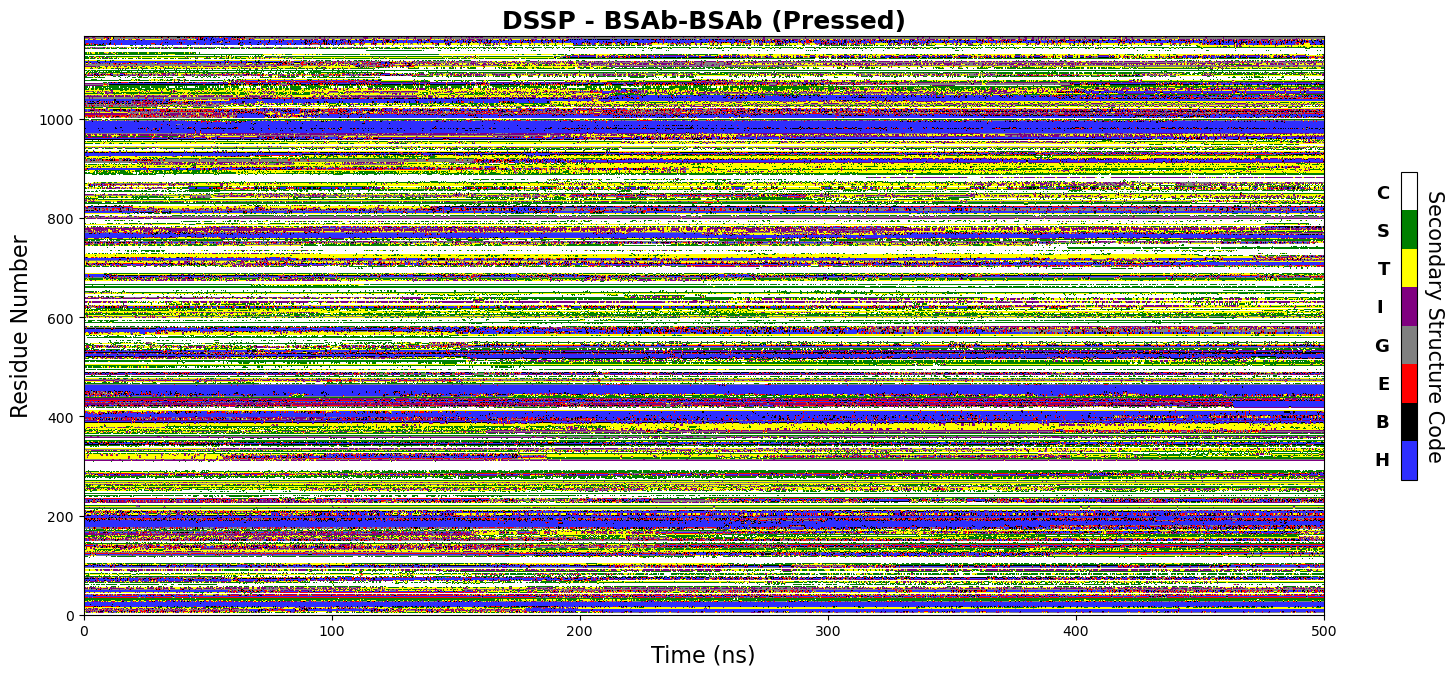



H (Helix/Alpha): 36.32%
E (Strand/Beta): 0.36%
C (Coil/Random): 63.32%


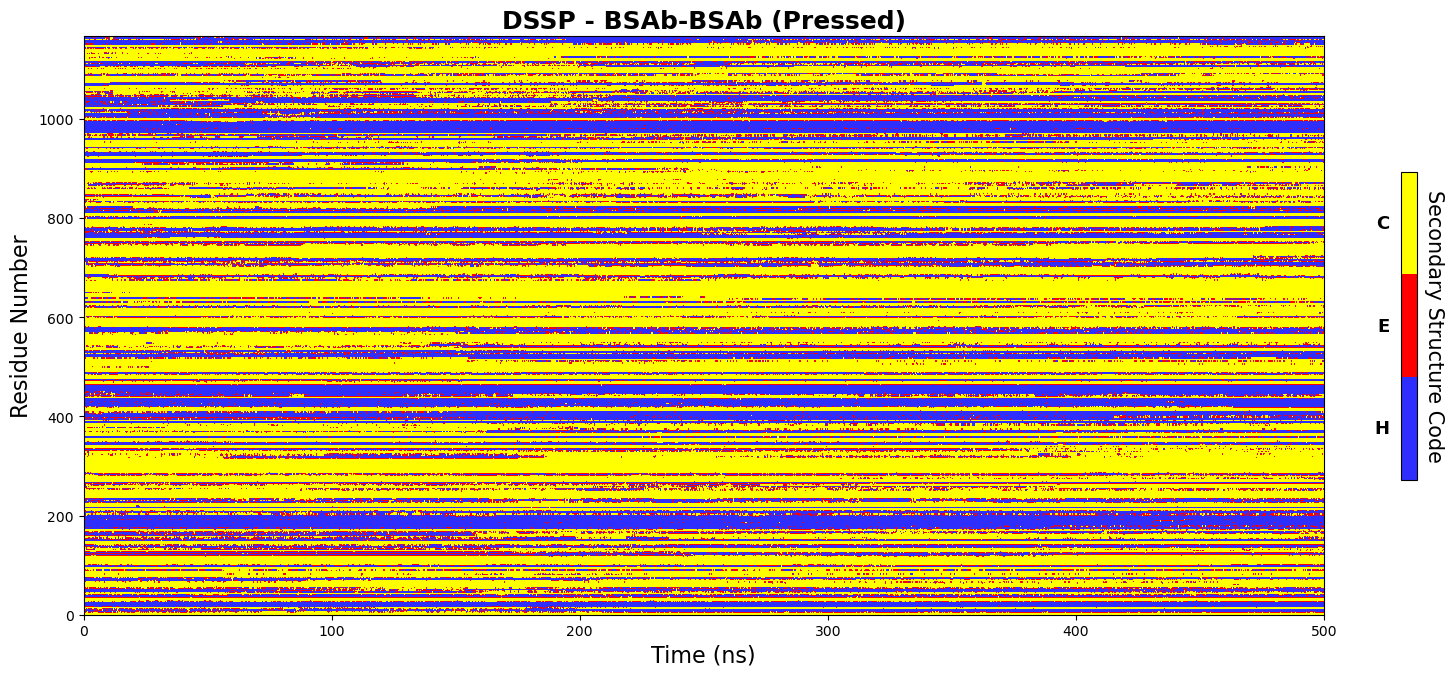



Alpha: 36.32%
Beta: 42.03%
Random Coil: 21.65%



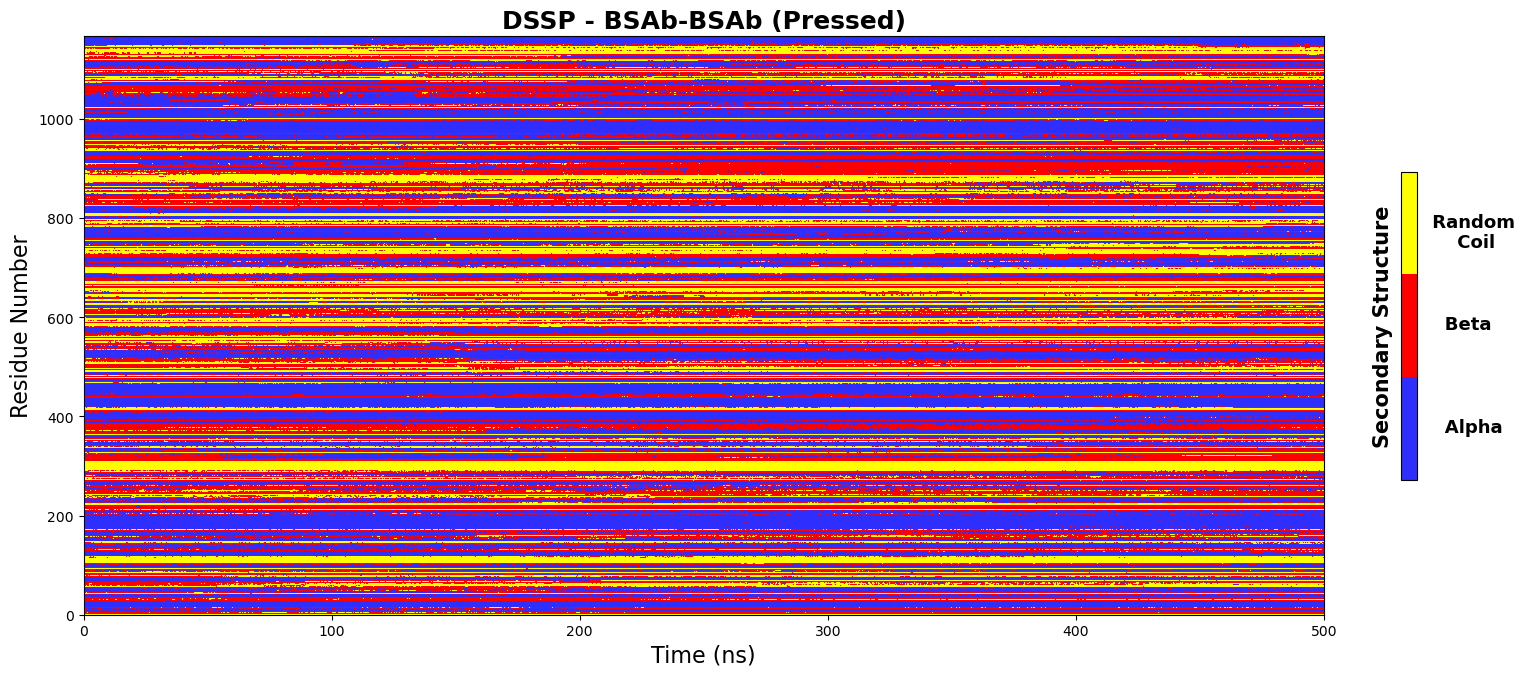

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 24.04%
B (B-Bridge): 0.13%
E (B-Sheet): 0.07%
G (3-Helix): 12.64%
I (5-Helix): 2.36%
T (B-Turn): 24.91%
S (Bend): 16.37%
C (Coil): 19.47%


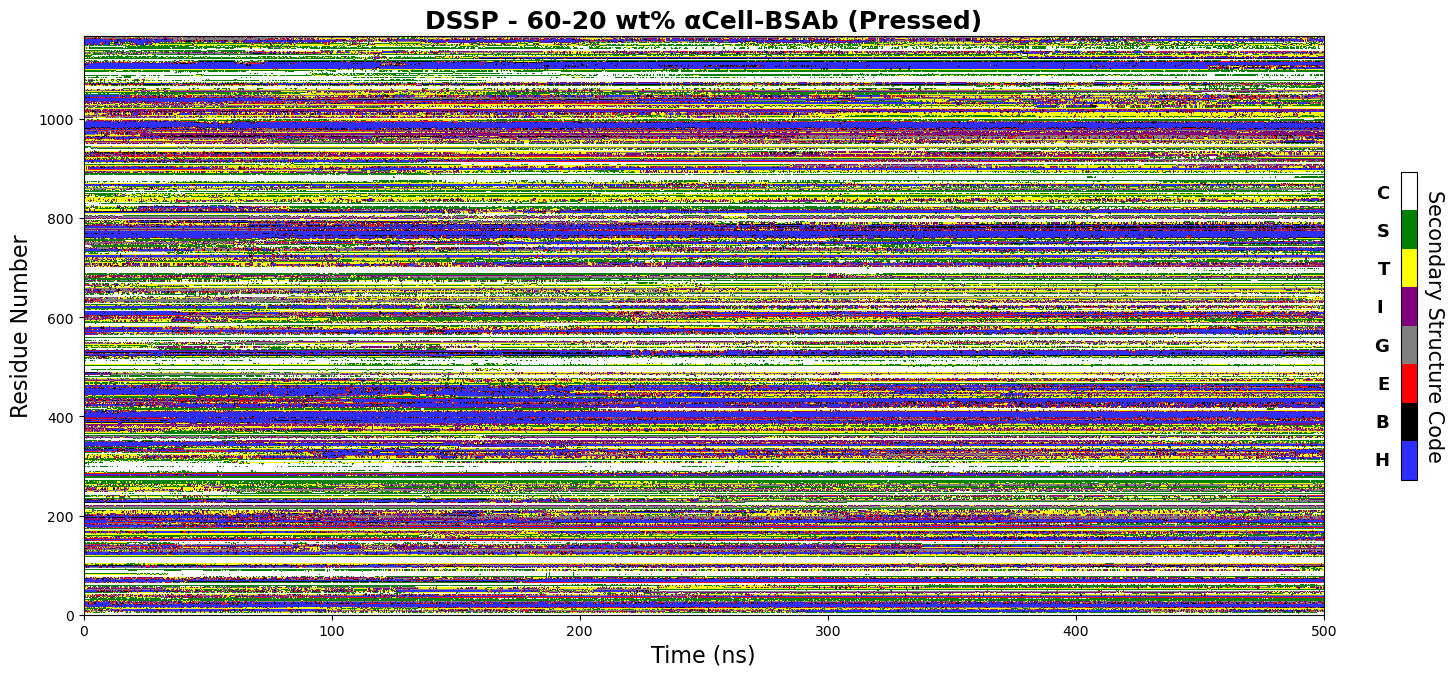



H (Helix/Alpha): 39.04%
E (Strand/Beta): 0.20%
C (Coil/Random): 60.75%


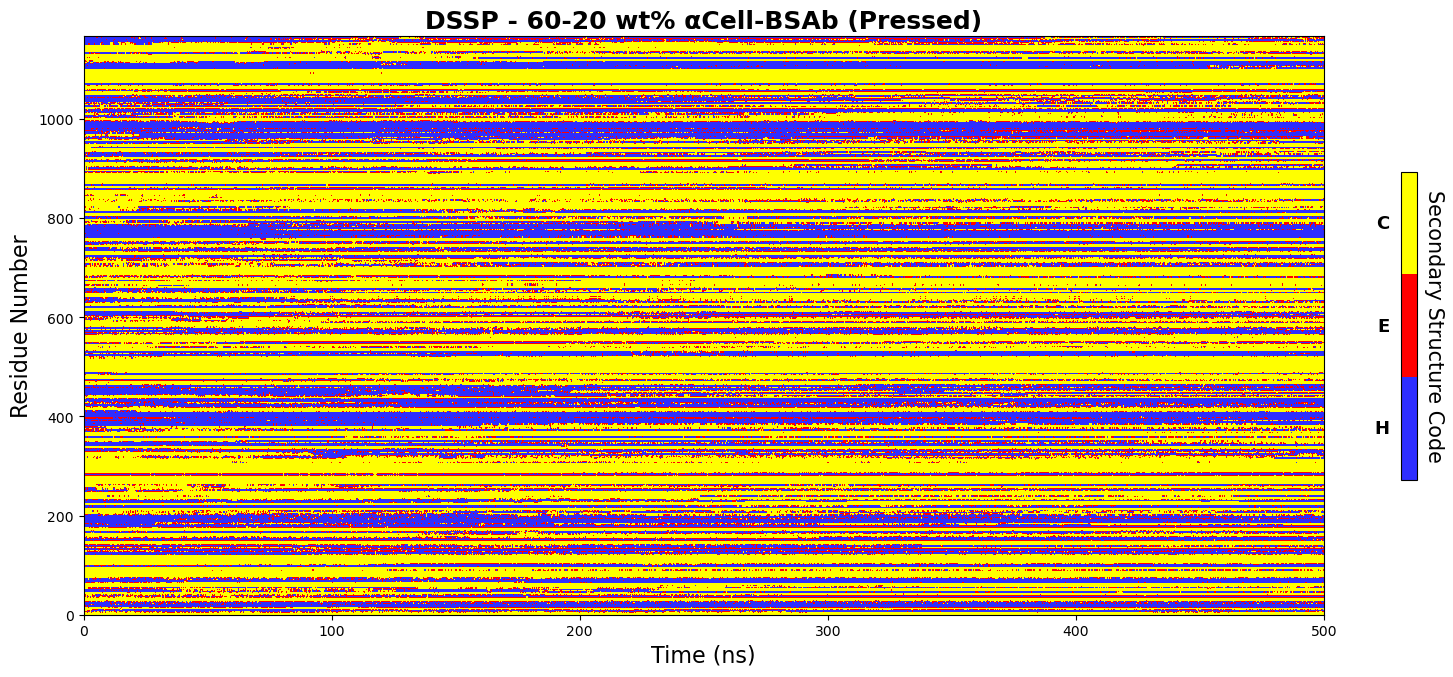



Alpha: 39.04%
Beta: 41.49%
Random Coil: 19.47%



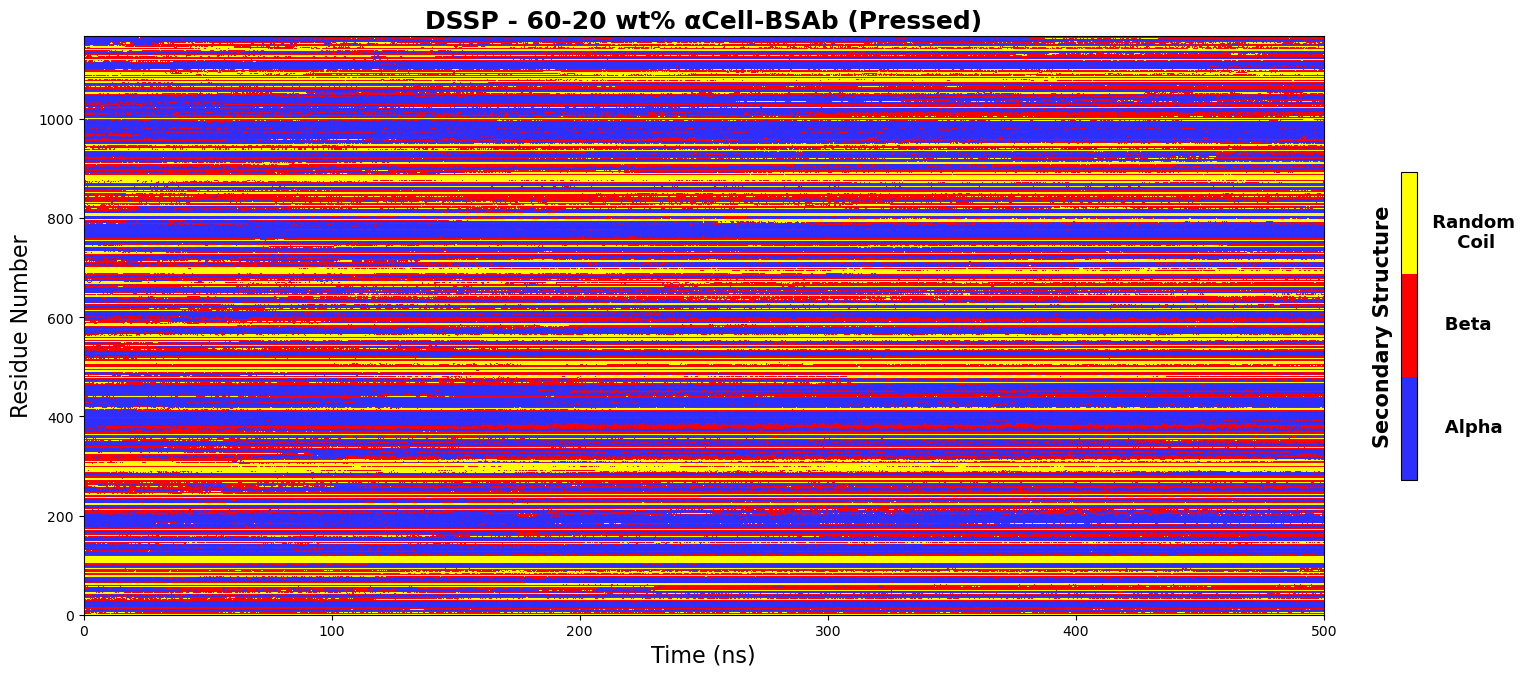

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


H (A-Helix): 30.58%
B (B-Bridge): 0.13%
E (B-Sheet): 0.22%
G (3-Helix): 10.57%
I (5-Helix): 2.46%
T (B-Turn): 21.88%
S (Bend): 14.78%
C (Coil): 19.38%


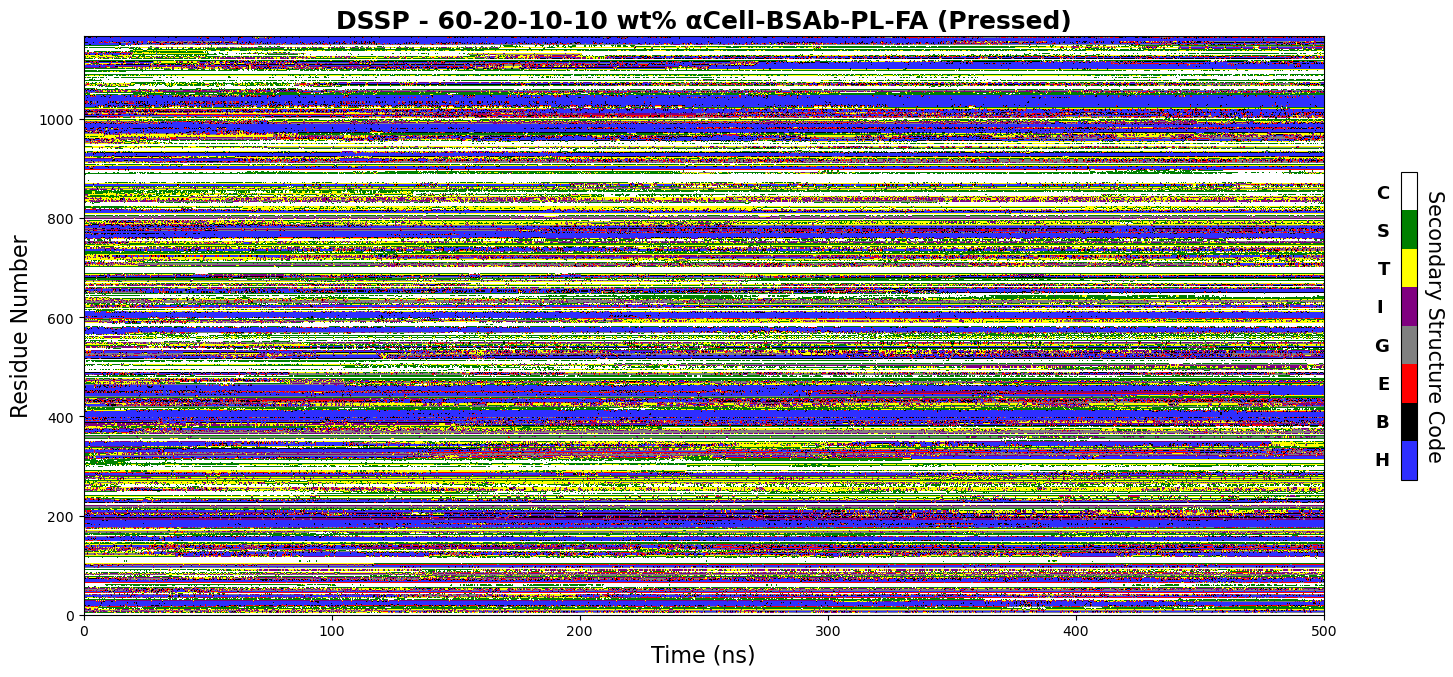



H (Helix/Alpha): 43.61%
E (Strand/Beta): 0.35%
C (Coil/Random): 56.04%


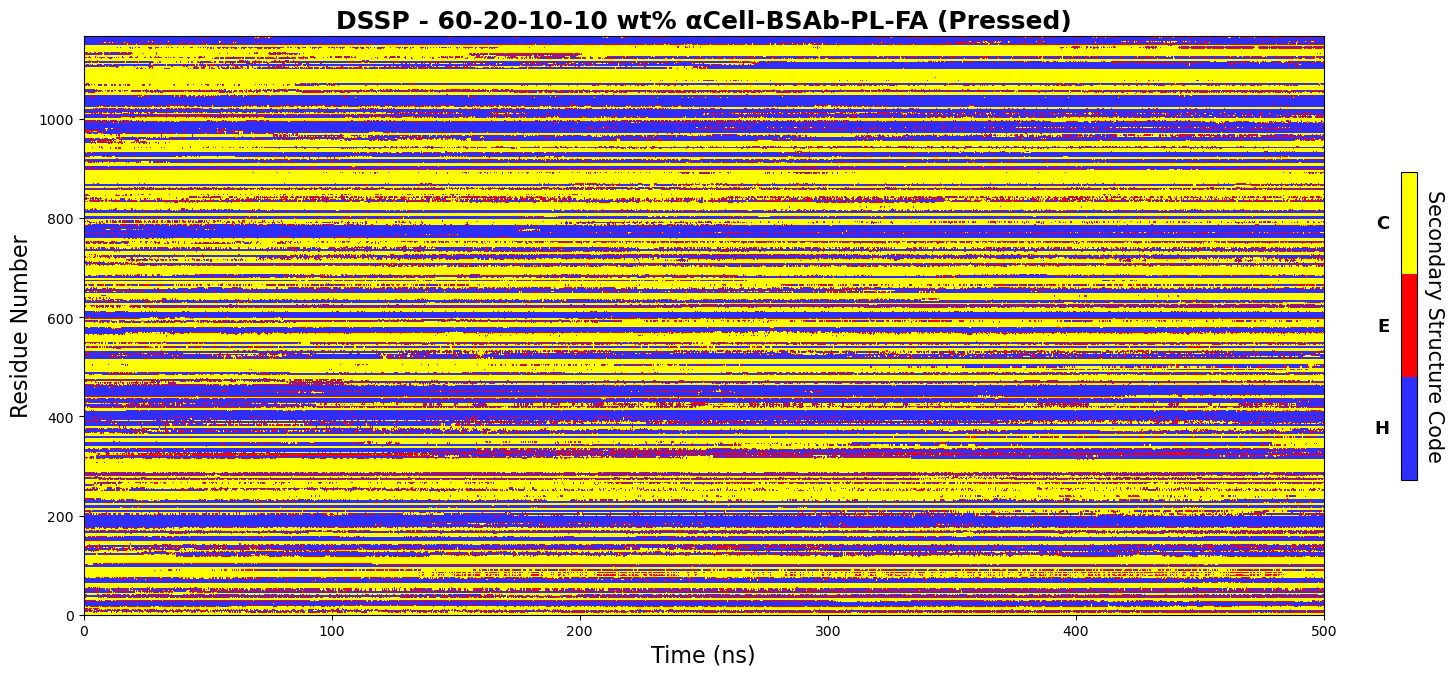



Alpha: 43.61%
Beta: 37.01%
Random Coil: 19.38%



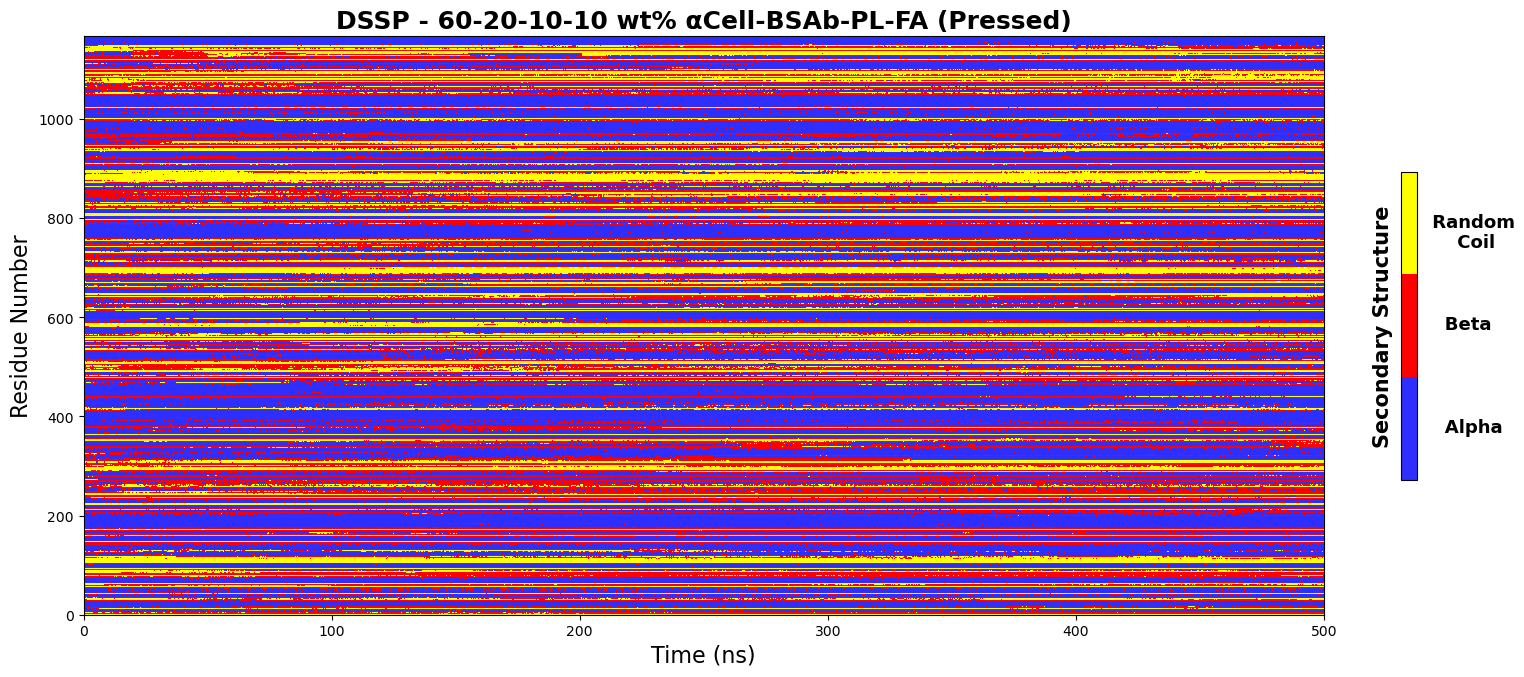

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import mdtraj as mdj

traj = mdj.load('../../BSA_b-BSA_b_pressed/traj_cluster_whole.xtc', top='../../BSA_b-BSA_b_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - BSAb-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA_b-BSA_b-402x_Cellulose6_pressed/traj_whole_nojump_mol.xtc', top='../../BSA_b-BSA_b-402x_Cellulose6_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20 wt% αCell-BSAb (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()



traj = mdj.load('../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/traj_whole_nojump_mol.xtc', top='../../BSA_b-BSA_b-402x_Cellulose6-292x_SRB-186x_STA_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (A-Helix): " + format(count_0/count_total*100, '.2f') + "%")
print("B (B-Bridge): " + format(count_1/count_total*100, '.2f') + "%")
print("E (B-Sheet): " + format(count_2/count_total*100, '.2f') + "%")
print("G (3-Helix): " + format(count_3/count_total*100, '.2f') + "%")
print("I (5-Helix): " + format(count_4/count_total*100, '.2f') + "%")
print("T (B-Turn): " + format(count_5/count_total*100, '.2f') + "%")
print("S (Bend): " + format(count_6/count_total*100, '.2f') + "%")
print("C (Coil): " + format(count_7/count_total*100, '.2f') + "%")
            
dssp_full = dssp_full.astype(float)

dssp_full_dict = {
    0: '#2e2eff',
    1: 'black',
    2: 'red',
    3: 'grey',
    4: 'purple',
    5: 'yellow',
    6: 'green',
    7: 'white', 
}

cmap_dssp_full = ListedColormap(['#2e2eff','black','red','grey','purple','yellow','green','white']) 
#cmap_dssp_full = LinearSegmentedColormap('dssp_full', dssp_full_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_full, cmap=cmap_dssp_full, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2,3,4,5,6,7])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','B   ','E   ','G   ','I    ','T   ','S   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 2.3, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple = mdj.compute_dssp(traj, simplified=True).T

count_0, count_1, count_2 = 0,0,0
for i in range(len(dssp_simple)):
    for j in range(len(dssp_simple[i])):
        if dssp_simple[i][j] == 'H':
            dssp_simple[i][j] = 0
            count_0 += 1
        if dssp_simple[i][j] == 'E':
            dssp_simple[i][j] = 1
            count_1 += 1
        if dssp_simple[i][j] == 'C':
            dssp_simple[i][j] = 2
            count_2 += 1

num_rows, num_cols = np.shape(dssp_full)
count_total = num_rows*num_cols
print("\n")
print("H (Helix/Alpha): " + format(count_0/count_total*100, '.2f') + "%")
print("E (Strand/Beta): " + format(count_1/count_total*100, '.2f') + "%")
print("C (Coil/Random): " + format(count_2/count_total*100, '.2f') + "%")
          
dssp_simple = dssp_simple.astype(float)

dssp_simple_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple = ListedColormap(['#2e2eff','red','yellow']) 
#cmap_dssp_simple = LinearSegmentedColormap('dssp_simple', dssp_simple_dict)

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple, cmap=cmap_dssp_simple, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['H   ','E   ','C   ']):
    cbar.ax.text(.5, (2 * j + 1) / 3.0, lab, ha='right', va='center', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 5
cbar.ax.set_ylabel('Secondary Structure Code', rotation=270, va = 'bottom', fontsize = 15)
plt.show()



dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new )): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=16)
plt.ylabel('Residue Number', fontsize=16)
plt.title('DSSP - 60-20-10-10 wt% αCell-BSAb-PL-FA (Pressed)', fontsize=18, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','   Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 13, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 15, fontweight = 'bold')
plt.show()

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


Alpha: 37.86%
Beta: 40.79%
Random Coil: 21.35%



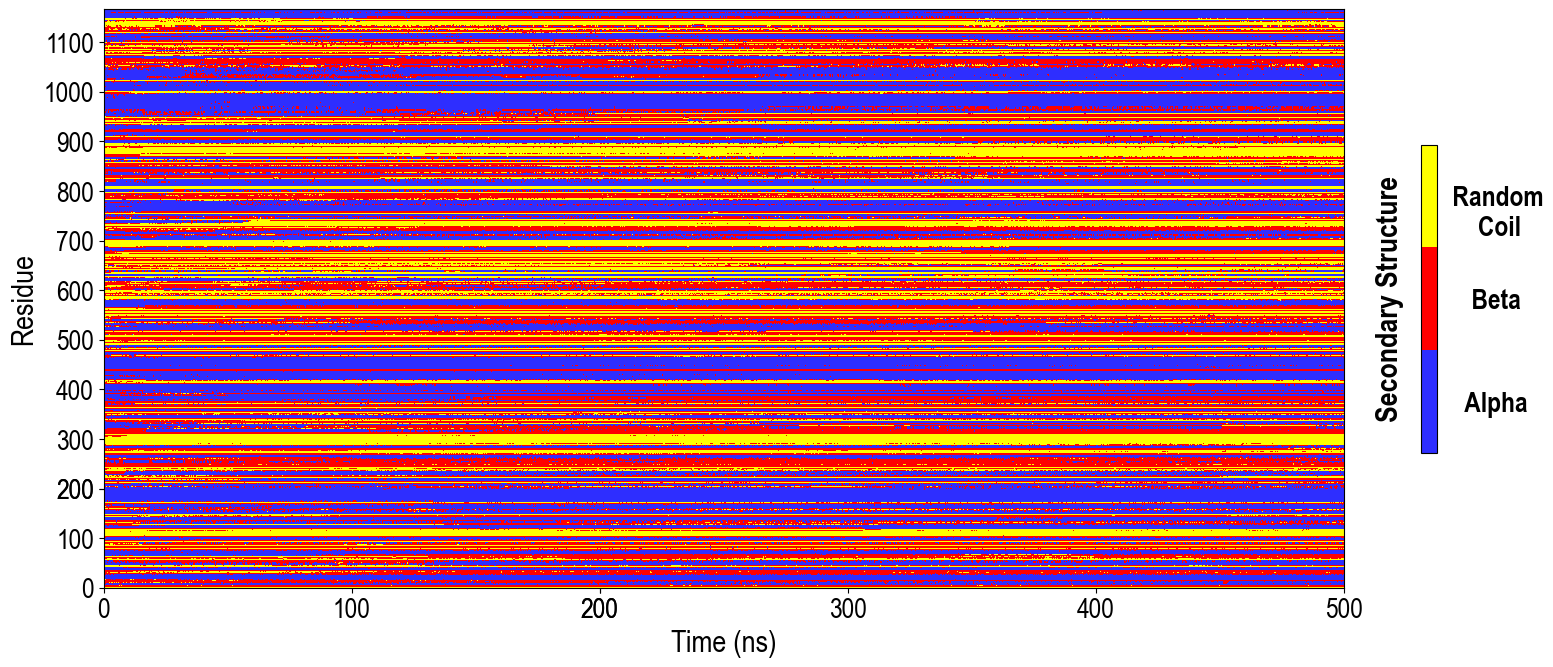

<mdtraj.Trajectory with 2501 frames, 18438 atoms, 1166 residues, and unitcells>


Alpha: 36.32%
Beta: 42.03%
Random Coil: 21.65%



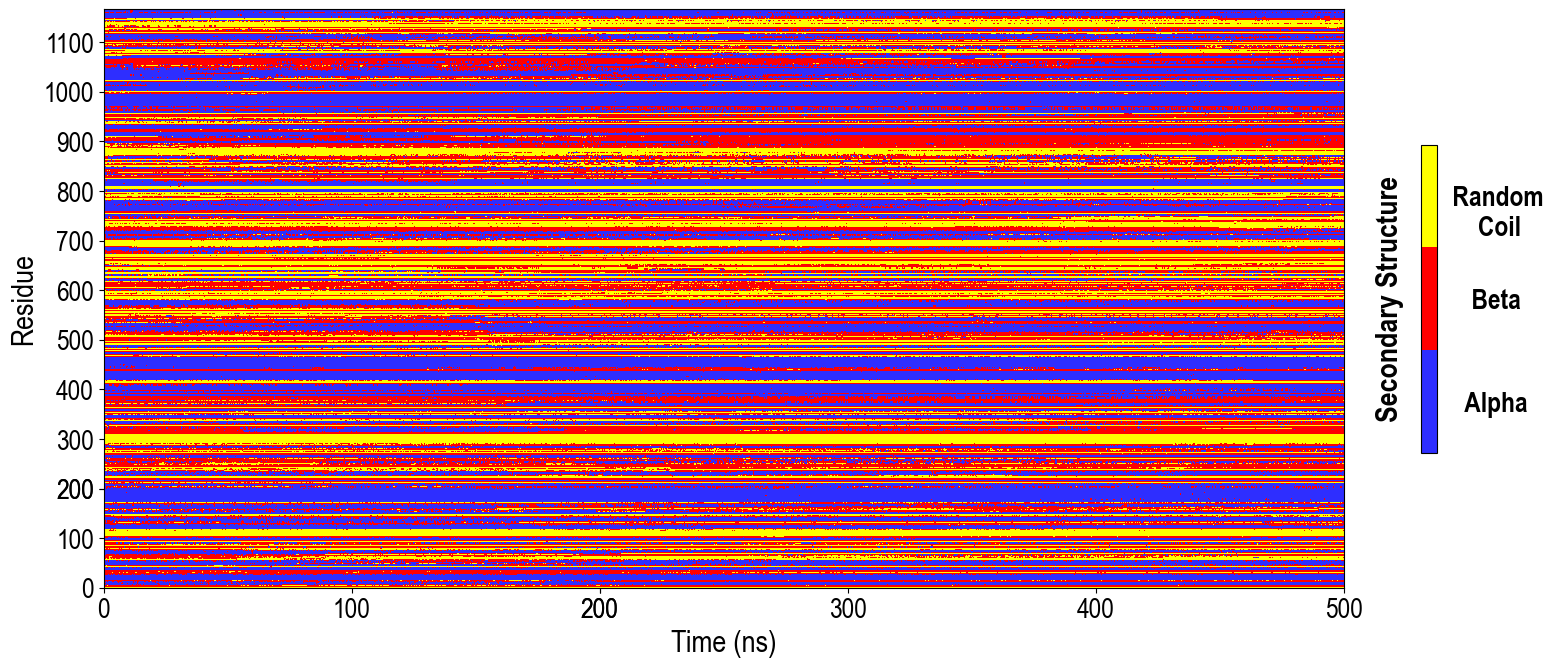

In [14]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Arial Narrow'
import numpy as np
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import mdtraj as mdj

traj = mdj.load('../../BSA_b-BSA_b_powder/traj_cluster_whole.xtc', top='../../BSA_b-BSA_b_powder/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1
    
dssp_full = dssp_full.astype(float)
dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new)): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=22)
plt.xticks([0,100,200,200,300,400,500], fontsize=20)
plt.ylabel('Residue', fontsize=22)
plt.yticks([0,100,200,200,300,400,500,600,700,800,900,1000,1100], fontsize=20)
#plt.title('DSSP - BSA (Powder-Sim)', fontsize=22, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','    Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 20, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 22, fontweight = 'bold')
plt.savefig("protein_dssp_powder.svg")
plt.show()



traj = mdj.load('../../BSA_b-BSA_b_pressed/traj_cluster_whole.xtc', top='../../BSA_b-BSA_b_pressed/md_resnr.gro', atom_indices=list(range(0,18438)))
print(traj)

dssp_full = mdj.compute_dssp(traj, simplified=False).T

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_full)):
    for j in range(len(dssp_full[i])):
        if dssp_full[i][j] == 'H':
            dssp_full[i][j] = 0
            count_0 += 1
        if dssp_full[i][j] == 'B':
            dssp_full[i][j] = 1
            count_1 += 1
        if dssp_full[i][j] == 'E':
            dssp_full[i][j] = 2
            count_2 += 1
        if dssp_full[i][j] == 'G':
            dssp_full[i][j] = 3
            count_3 += 1
        if dssp_full[i][j] == 'I':
            dssp_full[i][j] = 4
            count_4 += 1
        if dssp_full[i][j] == 'T':
            dssp_full[i][j] = 5
            count_5 += 1
        if dssp_full[i][j] == 'S':
            dssp_full[i][j] = 6
            count_6 += 1
        if dssp_full[i][j] == ' ':
            dssp_full[i][j] = 7
            count_7 += 1
    
dssp_full = dssp_full.astype(float)
dssp_simple_new = dssp_full

count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7 = 0,0,0,0,0,0,0,0
for i in range(len(dssp_simple_new)): 
    for j in range(len(dssp_simple_new [i])):
        if dssp_simple_new [i][j] == 0:
            dssp_simple_new [i][j] = 0
            count_0 += 1
        if dssp_simple_new [i][j] == 1:
            dssp_simple_new [i][j] = 1
            count_1 += 1
        if dssp_simple_new [i][j] == 2:
            dssp_simple_new [i][j] = 1
            count_2 += 1
        if dssp_simple_new [i][j] == 3:
            dssp_simple_new [i][j] = 0
            count_3 += 1
        if dssp_simple_new [i][j] == 4:
            dssp_simple_new [i][j] = 0
            count_4 += 1
        if dssp_simple_new [i][j] == 5:
            dssp_simple_new [i][j] = 1
            count_5 += 1
        if dssp_simple_new [i][j] == 6:
            dssp_simple_new [i][j] = 1
            count_6 += 1
        if dssp_simple_new [i][j] == 7:
            dssp_simple_new [i][j] = 2
            count_7 += 1

num_rows, num_cols = np.shape(dssp_simple_new)
count_total = num_rows*num_cols
print("\n")
print("Alpha: " + format((count_0+count_3+count_4)/count_total*100, '.2f') + "%")
print("Beta: " + format((count_1+count_2+count_5+count_6)/count_total*100, '.2f') + "%")
print("Random Coil: " + format(count_7/count_total*100, '.2f') + "%\n")

dssp_simple_new = dssp_simple_new.astype(float)

dssp_simple_new_dict = {
    0: '#2e2eff',
    1: 'red',
    2: 'yellow', 
}

cmap_dssp_simple_new = ListedColormap(['#2e2eff','red','yellow'])

plt.figure(figsize = (20, 20))
plt.imshow(dssp_simple_new, cmap=cmap_dssp_simple_new, origin='lower', extent=[0,500,0,1166], aspect = 0.2)
plt.xlabel('Time (ns)', fontsize=22)
plt.xticks([0,100,200,200,300,400,500], fontsize=20)
plt.ylabel('Residue', fontsize=22)
plt.yticks([0,100,200,200,300,400,500,600,700,800,900,1000,1100], fontsize=20)
#plt.title('DSSP - BSA (Press-Sim)', fontsize=22, fontweight = 'bold')
cbar = plt.colorbar(shrink=0.2, ticks=[0,1,2])
cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(['   Alpha','    Beta',' Random\n     Coil']):
    cbar.ax.text(1.6, (2 * j + 1.2) / 3.0, lab, ha='left', va='top', fontsize = 20, fontweight = 'bold')
cbar.ax.get_yaxis().labelpad = 0
cbar.ax.set_ylabel('Secondary Structure\n', rotation=90, va = 'bottom', fontsize = 22, fontweight = 'bold')
plt.savefig("protein_dssp_pressed.svg")
plt.show()